![Wind Energy Banner](img/2.png)

Author: Irene Kilgannon

Student ID: G00220627

## Introduction

Since the first commercial wind farm opened at Bellacorrick, Co. Mayo in 1992 the capacity of wind farms in Ireland has increased significantly. There are now over 300 wind farms in the Republic of Ireland with a capacity of 4780 MW and with 568 MW in construction. In 2000, the [capacity was only 116.5 MW](https://cms.eirgrid.ie/sites/default/files/publications/Wind-Installed-Capacities-May-24.png). Now, the Galway Wind Park, Ireland’s largest wind farm has a total capacity of 192 MW which exceeds the country's total capacity in the year 2000. 

<img src="img/Wind_farms_SEAI.png" alt="Wind Farms" width="400"/>

_Credit [SEAI Wind Atlas](https://www.seai.ie/renewable-energy/wind-energy/wind-atlas-map)_

Increasing the amount of electricity produced from renewable sources is one of the aims of [Ireland’s Climate Action Plan](https://www.gov.ie/pdf/?file=https://assets.gov.ie/296414/7a06bae1-4c1c-4cdc-ac36-978e3119362e.pdf#page=null). It is hoped that by 2030, 80% of Ireland's electricity will be produced from renewable sources, of which 9000 MW should come from onshore wind energy. According to the [SEAI](https://www.seai.ie/data-and-insights/seai-statistics/renewables), currently ~ 40% of Ireland’s electricity is from renewable sources, with one third from wind energy.

The amount of electricity a turbine generates depends on the type of turbine and the wind conditions at any time.  Older turbines are less efficient than newer turbines. In Barnesmore, Co. Donegal, there is a project with planning permission to repower an existing 15 MW wind farm with 25 turbines and replace it with 13 turbines capable of generating 60-70 MW. Fewer turbines producing more power. 

There are many advantages to wind energy. There are no carbon emissions and they are 100% efficient at turning wind into electricity. Wind energy avoided 4.5 million tonnes of CO2 in 2020. There are some carbon emissions during production but it is estimated that after the 'carbon payback period' of 6 - 18 months, the turbine has already saved more than was created from its production. It is cheaper than fossil fuels so it should drive down the price of power.  

The expected lifespan of a turbine is 30 years but in Ireland, some turbines have planning permission for 20-25 years. Wind energy companies have applied to extend planning permissions so that the wind farms can operate beyond their current planning permissions. This is not a straight forward task as some of the existing wind farms are in locations that, since they were built have been rezoned as unsuitable for wind energy by local county councils. Others are in or close to areas now designated as Special Protected Areas. It is estimated that up to 20% of current wind farms could be lost under the current planning restrictions, which would make the [Climate Action Plan unachievable](https://www.windenergyireland.com/latest-news/7733-dozens-of-wind-farms-at-risk-from-outdated-planning-decisions-2) by 2030. The lifespan of a turbine can be increased by repair and maintenance. In some cases like in Co. Donegal, they plan to repower by replacing older wind turbines with newer more efficient models. If a wind farm is decommissioned, e.g at the [Derrybrien Wind Farm, Co. Galway](https://www.derrybrienwindfarm.ie/info), 85-95% of turbine is mostly made of steel and can be recycled. The blades are made of fibreglass or carbon fibre held together with resin and cannot be easily or efficiently broken down for recycling.

## Project Aims

* Analyse wind energy production in the Republic of Ireland. 
    * Trends in wind speeds and wind energy.
    * How much of our energy comes from wind energy?
    * What influence does the weather have on wind energy production?

* Create a machine learning model that can predict the wind energy output based on weather data.

* Create a simple forecasting model to predict the wind energy production. 

In [91]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.dates import DateFormatter
from matplotlib.pylab import rcParams

# Modules for Seasonality
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import MSTL


# Modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
# Set style
plt.style.use('seaborn-v0_8')

## The Data

### Wind Energy Data

[EirGrid's real-time system information](https://www.eirgrid.ie/grid/real-time-system-information) and [EirGrid's Smart Grid Dashboard](https://www.smartgriddashboard.com/#all) provide information on the status of the electricity grid. Information on the current system demand, the total electricity production, the actual and forecast amount of electricity generated by wind energy, and the amount of imported electricity is available. The electricity produced is measured in MW. Data is recorded every 15 minutes. The results can be filtered by all of Ireland, the Republic of Ireland, and Northern Ireland. One disadvantage of the site is that it is only possible to view information for a day at a time and download data for any single day, up to one month ago.

<img src="img/Eirgrid_Smart_Dashboard.png" alt="Eirgrid_Smart_Dashboard" width="800"/>

_EirGrid Smart Grid Dashboard_

Despite extensive searching, there doesn't appear to be an official source of EirGrid's historical data. However, I found a [GitHub repository by Daniel Parke](https://github.com/Daniel-Parke/EirGrid_Data_Download/tree/main), who has written a Python script to download historical data from EirGrid. His GitHub repository contains CSV files for the actual amount of electricity generated, actual demand, and amount of electricity produced by wind energy for every year from 2014 to early 2024. As the Met Éireann weather data is for the Republic of Ireland, CSV files for the amount of wind energy produced in the Republic of Ireland from 2014 to 2023 were downloaded from this GitHub repository. To obtain the data for 2024 I ran his python script, [eirgrid_downloader.py](https://github.com/Daniel-Parke/EirGrid_Data_Download/blob/main/eirgrid_downloader.py) to get the 2024 data required for this analysis. 

Each CSV file was downloaded to the electricity directory and each CSV file contains one year's worth of data. The CSV files were merged and cleaned as outlined in [clean_electricity.ipynb](clean_electricity.ipynb) to give the CSV file, [hourly_wind_energy.csv](PFDA-project\data\hourly_wind_energy.csv), which will be used for this analysis. 

In [94]:
# Read hourly_wind_energy data into Pandas
wind_energy_df = pd.read_csv('data/hourly_wind_energy.csv', 
                            index_col= 'date', 
                            parse_dates= ['date']
                            )
wind_energy_df.head()

,Wind Energy (MW)
date,
2014-01-01 00:00:00,3907.0
2014-01-01 01:00:00,3657.0
2014-01-01 02:00:00,3754.0
2014-01-01 03:00:00,3645.0
2014-01-01 04:00:00,3660.0


Two additional CSV files, hourly_actual.csv and demand_actual.csv were read into Pandas. 

hourly_actual.csv has information on the actual amount of electricity produced in the ROI. This will be used to investigate to contribution of wind energy production to the total of electricity production. 

demand_actual.csv has information on the demand for electricity in the ROI.

The energy data is the measurement at the timestamp. 

In [95]:
# Read hourly_actual.csv into Pandas
actual_df = pd.read_csv('data/hourly_actual.csv', index_col= 'date', parse_dates= ['date'])
actual_df.head()

,Actual (MW)
date,
2014-01-01 00:00:00,10830.0
2014-01-01 01:00:00,10180.0
2014-01-01 02:00:00,9595.0
2014-01-01 03:00:00,9223.0
2014-01-01 04:00:00,9432.0


In [96]:
# Read hourly_demand.csv into Pandas
demand_df = pd.read_csv('data/hourly_demand.csv', index_col= 'date', parse_dates= ['date'])
demand_df.head()

,Demand (MW)
date,
2014-01-01 00:00:00,11381.0
2014-01-01 01:00:00,10550.0
2014-01-01 02:00:00,9653.0
2014-01-01 03:00:00,9006.0
2014-01-01 04:00:00,8529.0


If the demand for electricity exceeds the actual energy production, energy is imported into Ireland through a number of [interconnectors](https://www.eirgrid.ie/industry/interconnection) with the UK and Europe.

### Weather Data

The weather data was downloaded from [Met Éireann historical data](https://www.met.ie/climate/available-data/historical-data). The data from a number of weather stations was downloaded with the choice of weather station based on its proximity to a wind farm. Dublin Airport was selected as it contains weather information dating back to 1945.  Weather information for Shannon Airport, and Valentia also date back to the mid-1940's.

The Met Éireann weather data used for this analysis was recorded hourly. Measurements such as rainfall (mm), wind speed (knots), wind direction (degrees), relative humidity (%) and temperature (Celsius) are recorded. 

The preparation of the weather data for analysis is described in [clean_weather.ipynb](clean_weather.ipynnb). Two CSV files, [full_weather.csv](data/weather/merged_data/full_weather.csv) and [weather_analysis.csv](data/weather/merged_data/weather_analysis.csv) were created. 

Full_weather.csv has the hourly weather data for all weather stations. It is the raw unprocessed hourly data. full_weather.csv was used to analyse weather trends in the notebook [weather_trends.ipynb](weather_trends.ipynb).

Weather_analysis.csv was created from full_weather.csv. It contains the hourly mean weather data for all weather stations from 2014 to 2024. It will be merged with the wind energy data set to create a data set with weather and energy data. 

In [97]:
# Read in weather_analysis
weather_df = pd.read_csv('data/weather/merged_data/weather_analysis.csv', 
                        index_col= 'date', 
                        parse_dates= ['date']
                        )

weather_df.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
2014-01-01 00:00:00,988.63,0.02,83.17,5.52,189.17,11.58
2014-01-01 01:00:00,988.32,0.01,85.67,5.03,186.67,10.17
2014-01-01 02:00:00,987.72,0.03,87.17,5.09,170.83,9.17
2014-01-01 03:00:00,986.86,0.15,87.75,5.11,165.00,9.33
2014-01-01 04:00:00,985.55,0.20,89.33,5.21,157.50,9.75


### Merge Weather and Wind Energy Data Sets

The Pandas documentation has helpful [user guide](https://pandas.pydata.org/docs/user_guide/merging.html) to merging and joining data sets. The concat() function, with axis = 1 joins dataframes horizontally. 

In [98]:
# Merge weather and energy dataframes.
electricity_weather = pd.concat([weather_df, wind_energy_df, actual_df, demand_df], axis = 1)
electricity_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
date,,,,,,,,,
2014-01-01 00:00:00,988.63,0.02,83.17,5.52,189.17,11.58,3907.0,10830.0,11381.0
2014-01-01 01:00:00,988.32,0.01,85.67,5.03,186.67,10.17,3657.0,10180.0,10550.0
2014-01-01 02:00:00,987.72,0.03,87.17,5.09,170.83,9.17,3754.0,9595.0,9653.0
2014-01-01 03:00:00,986.86,0.15,87.75,5.11,165.00,9.33,3645.0,9223.0,9006.0
2014-01-01 04:00:00,985.55,0.20,89.33,5.21,157.50,9.75,3660.0,9432.0,8529.0


In [99]:
# Save the data 
#electricity_weather.to_csv('data/electricity_weather.csv')

## Preparation of electricity_weather for Analysis

### Check for Missing Data

In [100]:
# Check for missing data
electricity_weather.isna().sum()

Pressure (hPa)           22
Rain (mm)                22
Relative Humidity (%)    22
Temp (°C)                22
Wind Direction (deg)     22
Wind Speed (knots)       22
Wind Energy (MW)          0
Actual (MW)               0
Demand (MW)               0
dtype: int64

In [101]:
# Find the rows with missing data
nan_rows = electricity_weather[electricity_weather.isna().any(axis = 1)]
nan_rows

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
date,,,,,,,,,
2025-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7807.0,10959.0,13993.0
2025-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7782.0,10905.0,13490.0
2025-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7319.0,10487.0,13112.0
2025-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6796.0,9983.0,12673.0
2025-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6167.0,9340.0,12180.0
2025-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5951.0,9131.0,11947.0
2025-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7166.0,10378.0,12172.0
2025-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7567.0,10741.0,12646.0
2025-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6874.0,10069.0,12936.0


The missing data is weather information for the 1st January 2025. These rows will be dropped.

In [102]:
# Drop the rows with missing data
electricity_weather = electricity_weather.dropna()

In [103]:
# Check that the missing rows at the tail of the data set have been removed. 
electricity_weather.tail()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW)
date,,,,,,,,,
2024-12-31 19:00:00,1004.70,0.68,87.67,9.28,238.33,13.33,9812.0,13238.0,17192.0
2024-12-31 20:00:00,1004.55,0.66,89.25,8.78,241.67,12.58,8866.0,12246.0,16085.0
2024-12-31 21:00:00,1004.07,0.76,86.75,8.55,235.00,11.83,8324.0,11816.0,15275.0
2024-12-31 22:00:00,1003.66,0.98,88.67,8.16,245.83,11.50,7689.0,10952.0,14598.0
2024-12-31 23:00:00,1002.96,0.93,87.92,7.98,246.67,12.50,7557.0,10745.0,14391.0


In [104]:
# Check for duplicates
electricity_weather.duplicated().sum()

0

### SNSP Limit and Dispatch Down

Wind energy is an intermittent source of electricity. Over the first ten months of 2024, 14% of wind energy production was lost because of [challenges with the transmission network](https://www.windenergyireland.com/latest-news/7815-wind-farms-provided-32-per-cent-of-ireland-s-electricity-so-far-in-2024-3). When this happens wind farms are instructed to reduce the amount of power they produce or shut down completely. This is called ['dispatch down'](https://cms.eirgrid.ie/sites/default/files/publications/Wind-DD-Historical-December-2024.png). Dispatch down arises due to constraints and curtailments. 

Ireland's electricity, like most other locations in the world operates at a frequency of 50 Hz. Wind energy is 'non-synchronous', which means that the frequency at which the wind produces energy is not at 50 Hz. To ensure the frequency levels stay stable, EirGrid have a 'System Non-Synchronous Penetration (SNSP) limit in place. SNSP is the best known form of curtailment. The SNSP limit has been increasing steadily. From 2011 to 2018, the SNSP limit was gradually increased from 50% to 65%. In 2022, the SNSP limit was increased to its current level of 75%. This means that on a very windy day wind farms are dispatched down until they reach the 75% limit.

A column for the SNSP Limit will be added to the dataframe to answer the question, has increasing the SNSP limit increased wind energy output? The data was obtained from [eirgrid.ie](https://cms.eirgrid.ie/sites/default/files/publications/Wind-DD-Historical-December-2024.png)

In [105]:
# Add SNSP Column
electricity_weather['SNSP'] = 0.5

In [106]:
# Adjust values in the SNSP column.
electricity_weather.loc['2015-10': '2016-09', 'SNSP'] = 0.55
electricity_weather.loc['2016-10': '2017-10', 'SNSP'] = 0.60
electricity_weather.loc['2017-11': '2020-12', 'SNSP'] = 0.65
electricity_weather.loc['2021-01': '2021-03', 'SNSP'] = 0.70
electricity_weather.loc['2021-04': , 'SNSP'] = 0.75

### Resample the Dataframes

The electricity_weather was [resampled](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) by monthly and yearly averages to create electricity_weather_monthly and electricity_weather_yearly. As the full data set has almost 96,000 rows, plots of the full data set can be difficult to visualise. Resampling simplifies the plots. 

In [107]:
# Resample electricity_weather to monthly
electricity_weather_monthly = electricity_weather.resample('ME').mean()
electricity_weather_monthly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
date,,,,,,,,,,
2014-01-31,993.884435,0.244180,87.123763,5.875753,211.225417,10.867594,3098.799731,11672.151882,12904.573925,0.5
2014-02-28,988.311429,0.275030,84.325030,5.749256,212.415804,13.037649,3701.735119,11828.928571,12989.111607,0.5
2014-03-31,1013.142648,0.122782,84.740054,7.045712,202.654597,9.622581,2591.403226,11519.604839,12373.458333,0.5
2014-04-30,1012.485069,0.075319,80.475625,9.921458,176.797472,8.629181,1975.644444,10615.762500,11376.001389,0.5
2014-05-31,1014.004167,0.135027,83.432272,11.358602,200.795336,8.646425,1844.071237,10240.799731,11067.923387,0.5


In [108]:
# Resample electricity_weather to yearly
electricity_weather_yearly = electricity_weather.resample('YE').mean()
electricity_weather_yearly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
date,,,,,,,,,,
2014-12-31,1009.612358,0.143958,83.663824,10.373425,202.467838,8.969831,2309.596804,11001.091553,11767.631735,0.500000
2015-12-31,1014.334928,0.158265,82.578727,9.749905,207.072672,9.750983,2985.015183,12079.515639,12146.754224,0.512603
2016-12-31,1014.133200,0.126062,82.708215,10.061733,197.370263,8.765640,2763.018784,13086.686913,12380.604337,0.562568
2017-12-31,1014.494323,0.131558,83.605372,10.331381,212.948322,8.970461,3298.931279,13090.570776,12676.343037,0.608356
2018-12-31,1012.622821,0.130379,82.380785,10.145537,196.043534,8.948595,3964.443436,13355.889269,13208.212557,0.650000


## Exploratory Data Analysis

### Statistics about the Dataset

In [109]:
# No of rows and columns in the data set
electricity_weather.shape

(96432, 10)

In [110]:
# Numerical Statistics
electricity_weather.describe().round(2)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
count,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00,96432.00
mean,1012.92,0.14,83.07,10.33,203.11,8.87,4025.13,13073.50,13419.47,0.65
std,12.63,0.27,9.65,4.48,62.77,4.10,3179.29,2443.56,2656.43,0.09
min,952.68,0.00,36.17,-4.42,15.83,1.50,-176.00,6024.00,6737.00,0.50
25%,1005.42,0.00,77.67,7.12,160.00,5.67,1321.00,11416.00,11449.00,0.60
50%,1014.29,0.03,85.33,10.37,210.83,8.17,3270.00,12884.00,13542.00,0.65
75%,1021.70,0.15,90.42,13.62,250.00,11.25,6168.00,14520.00,15325.00,0.75
max,1048.03,4.72,98.58,27.44,350.83,30.83,15257.00,29722.00,31193.00,0.75


In [111]:
# Dataframe information. 
electricity_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96432 entries, 2014-01-01 00:00:00 to 2024-12-31 23:00:00
Freq: h
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure (hPa)         96432 non-null  float64
 1   Rain (mm)              96432 non-null  float64
 2   Relative Humidity (%)  96432 non-null  float64
 3   Temp (°C)              96432 non-null  float64
 4   Wind Direction (deg)   96432 non-null  float64
 5   Wind Speed (knots)     96432 non-null  float64
 6   Wind Energy (MW)       96432 non-null  float64
 7   Actual (MW)            96432 non-null  float64
 8   Demand (MW)            96432 non-null  float64
 9   SNSP                   96432 non-null  float64
dtypes: float64(10)
memory usage: 10.1 MB


The data set for weather-energy analysis has 10 columns, with almost 96500 rows. 

The index is of a datetime datatype, with the date and time the observation was recorded at. The measurements recorded were pressure (hPa), rain (mm), relative humidity (%), temperature (°C), wind direction (deg), wind speed (knots) and wind energy (MW). The columns are all of float datatype. Any missing rows were removed and there are no duplicates in the data set. 

### Histograms

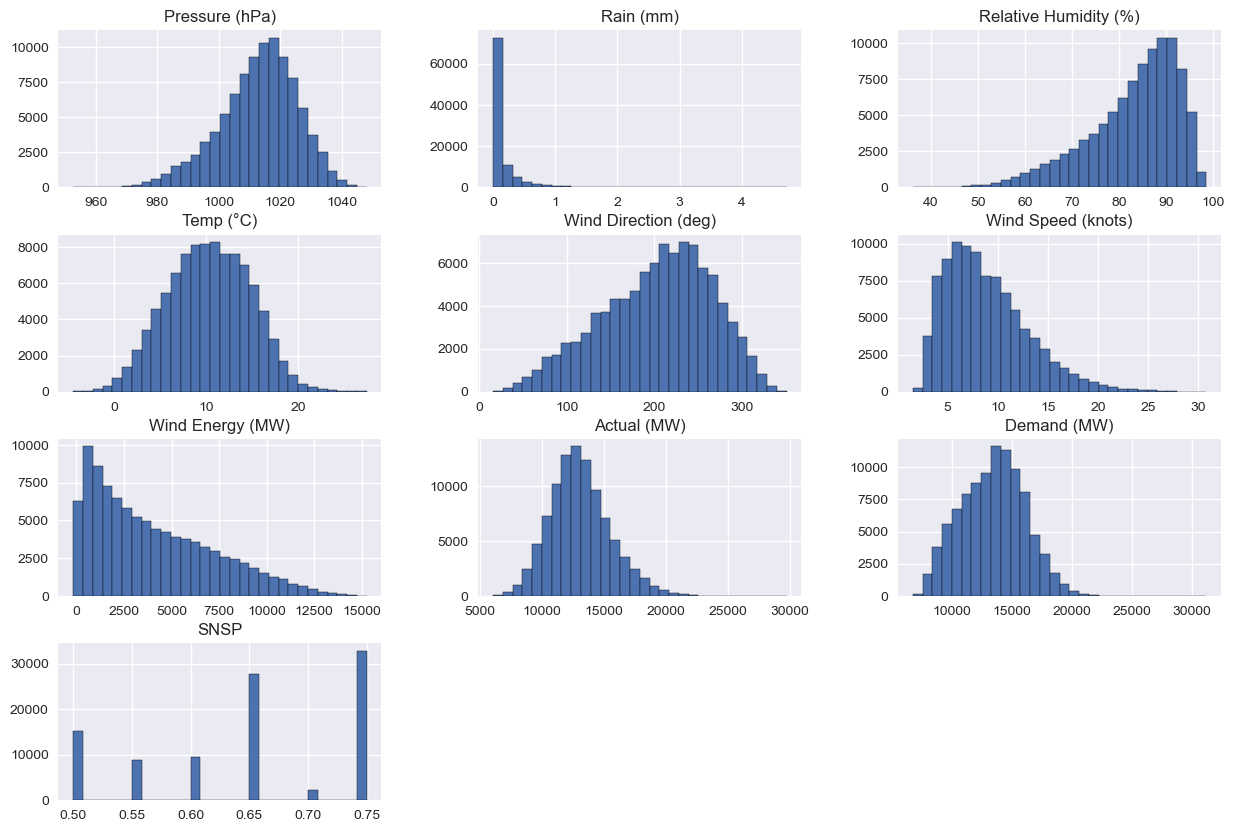

In [112]:
# Plot the distribution of the data
electricity_weather.hist(figsize= (15,10), bins = 30, edgecolor = 'black')

plt.show()

### Scatter plots 

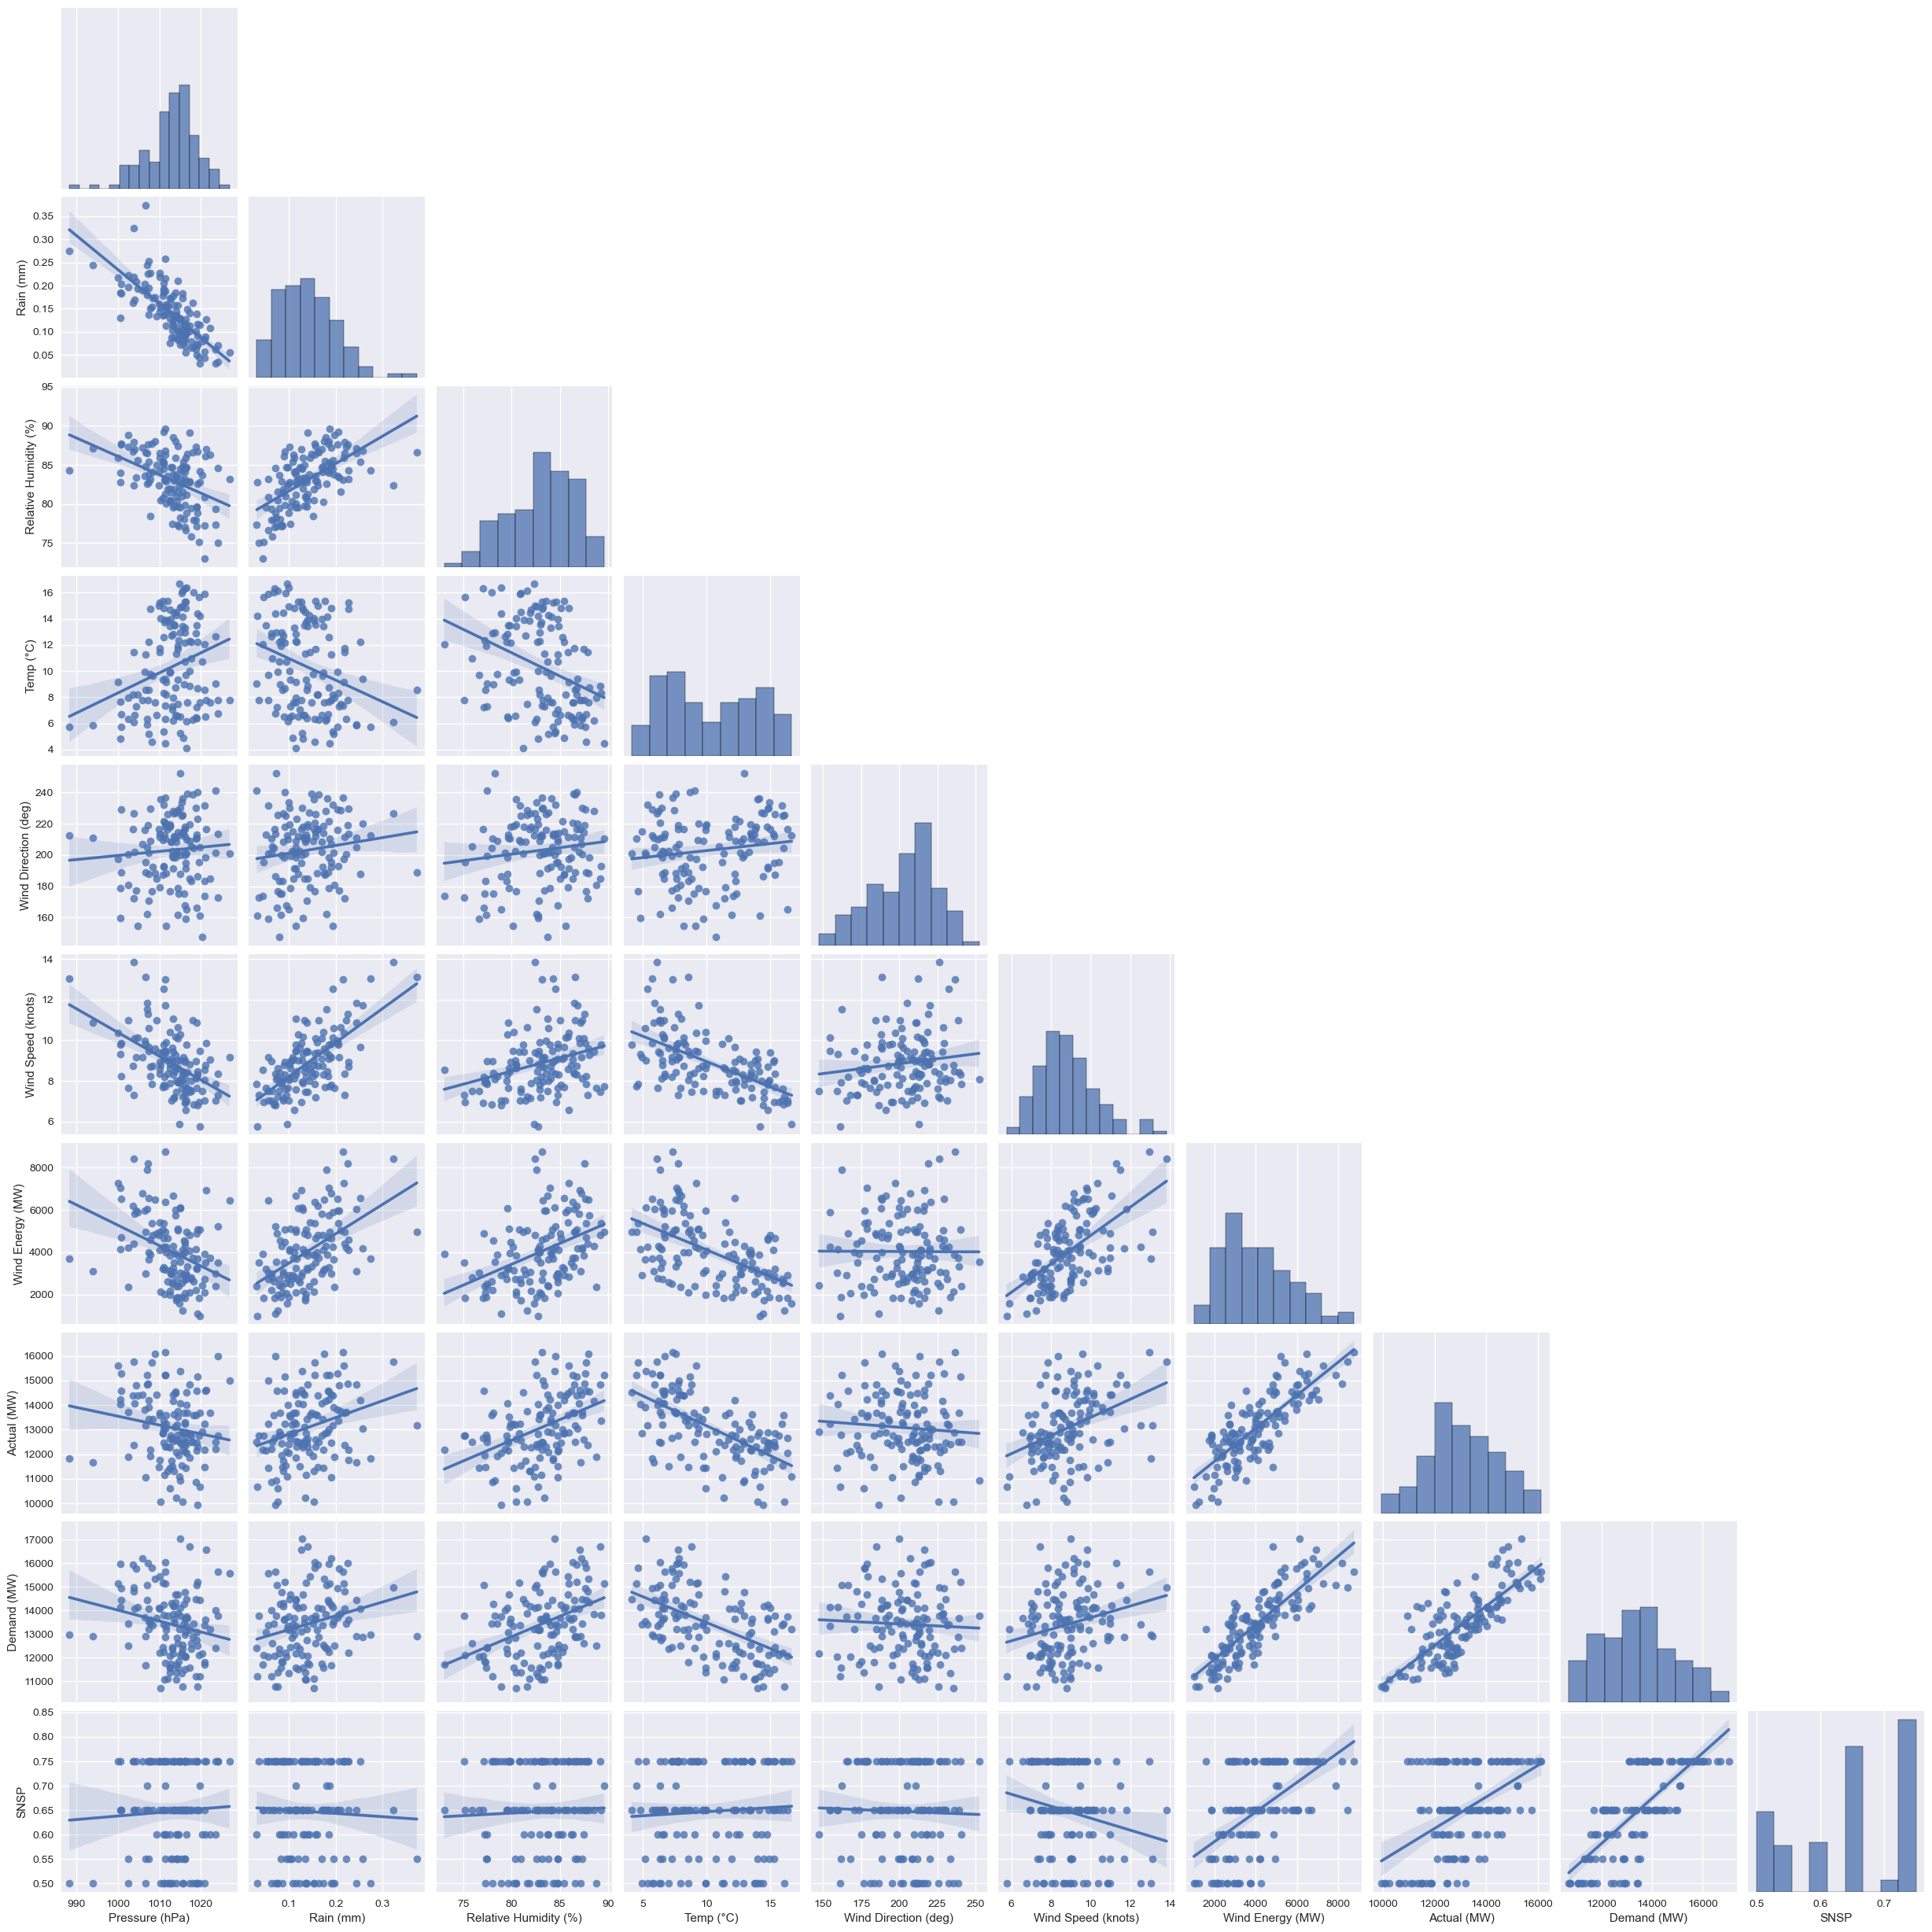

In [113]:
sns.pairplot(data= electricity_weather_monthly, kind = 'reg', corner = True)
plt.show()

In [114]:
# Correlation Analysis
electricity_weather.corr().round(3)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
Pressure (hPa),1.000,-0.397,-0.181,0.099,-0.026,-0.400,-0.353,-0.121,-0.059,0.022
Rain (mm),-0.397,1.000,0.270,0.001,-0.071,0.340,0.314,0.133,0.032,-0.010
Relative Humidity (%),-0.181,0.270,1.000,-0.289,-0.050,-0.186,0.016,-0.109,-0.231,0.015
Temp (°C),0.099,0.001,-0.289,1.000,-0.003,0.049,-0.090,-0.134,-0.055,0.049
Wind Direction (deg),-0.026,-0.071,-0.050,-0.003,1.000,0.157,0.064,-0.002,0.023,-0.011
Wind Speed (knots),-0.400,0.340,-0.186,0.049,0.157,1.000,0.797,0.368,0.179,-0.073
Wind Energy (MW),-0.353,0.314,0.016,-0.090,0.064,0.797,1.000,0.513,0.284,0.278
Actual (MW),-0.121,0.133,-0.109,-0.134,-0.002,0.368,0.513,1.000,0.795,0.273
Demand (MW),-0.059,0.032,-0.231,-0.055,0.023,0.179,0.284,0.795,1.000,0.400
SNSP,0.022,-0.010,0.015,0.049,-0.011,-0.073,0.278,0.273,0.400,1.000


There is a relatively strong correlation between wind speed and wind energy, with a correlation coefficient of 0.797.

## Investigate Wind Energy

### How many instances of low energy production are there?

According to [Orsted, a wind energy company with a number of wind farms in Ireland](https://orsted.ie/renewable-energy-solutions/onshore-wind/onshore-wind-facts/is-onshore-wind-power-reliable?gad_source=1&gclid=Cj0KCQiAvbm7BhC5ARIsAFjwNHsqQo_o5BNQDDSs188yJNVjuNKutenLgB4fyrrApMoVsbYHk8igaZUaAk-YEALw_wcB) for the time period 2019-2022, 91% of the time there is enough wind for production, 1% of time there is too much wind and 8% of the time too little wind. 

The histogram for wind energy indicates that there are a number of rows with values less than zero. 

In [115]:
# How many rows have values less than zero?
count_negative_wind_energy = (electricity_weather['Wind Energy (MW)'] < 0).sum()
count_negative_wind_energy

49

In [116]:
# Filtering to Wind Energy for values less than 0.
electricity_weather.loc[electricity_weather['Wind Energy (MW)'] < 0]

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP
date,,,,,,,,,,
2014-10-12 00:00:00,1012.22,0.00,93.92,5.73,147.50,2.00,-3.0,9586.0,9521.0,0.50
2014-10-12 01:00:00,1012.32,0.00,94.67,5.32,167.50,1.75,-10.0,9270.0,8939.0,0.50
2014-10-12 02:00:00,1012.32,0.00,95.33,5.13,195.83,2.42,-6.0,8766.0,8407.0,0.50
2014-10-12 03:00:00,1012.22,0.01,95.67,5.31,215.83,2.42,-5.0,8483.0,8038.0,0.50
2014-10-12 05:00:00,1012.18,0.02,96.17,4.62,168.33,2.75,-4.0,8029.0,7934.0,0.50
2014-10-12 06:00:00,1012.27,0.01,97.00,4.33,124.17,2.83,-5.0,8467.0,8102.0,0.50
2014-10-12 07:00:00,1012.55,0.00,97.00,4.19,195.00,2.75,-6.0,8689.0,8523.0,0.50
2016-05-16 09:00:00,1023.16,0.00,70.25,11.98,160.00,3.42,-9.0,12228.0,13472.0,0.55
2016-05-16 10:00:00,1022.94,0.00,68.00,13.02,182.50,3.75,-4.0,11998.0,13557.0,0.55


There were 49 occasions when the wind turbines consumed energy from the grid instead of producing energy. From the data, it appears that this occurred when wind speeds were low. 

In [117]:
# Count when Wind Energy production was zero
count_zero_energy = (electricity_weather['Wind Energy (MW)'] == 0).sum()
count_zero_energy

4

In [118]:
# Count times wind energy production is less than 1000 MW
count_low_energy = (electricity_weather['Wind Energy (MW)'] <= 1000).sum()
count_low_energy

18859

In [119]:
# For what percentage of the time is wind energy production less that 1000 MW?
per_cent_low = count_low_energy/len(electricity_weather) * 100
per_cent_low

19.556786129085783

There were four instances where energy production was 0 MW. 

Taking into account that the mean value for wind energy production is 4025 MW, and that the 25% percentile is 1320 MW, 1000 MW was selected as the limit below which, I considered to be low energy production. Surprisingly, for 19.56% of the time wind energy production is below 1000 MW. 

### What is the relationship between wind speed and wind energy production?

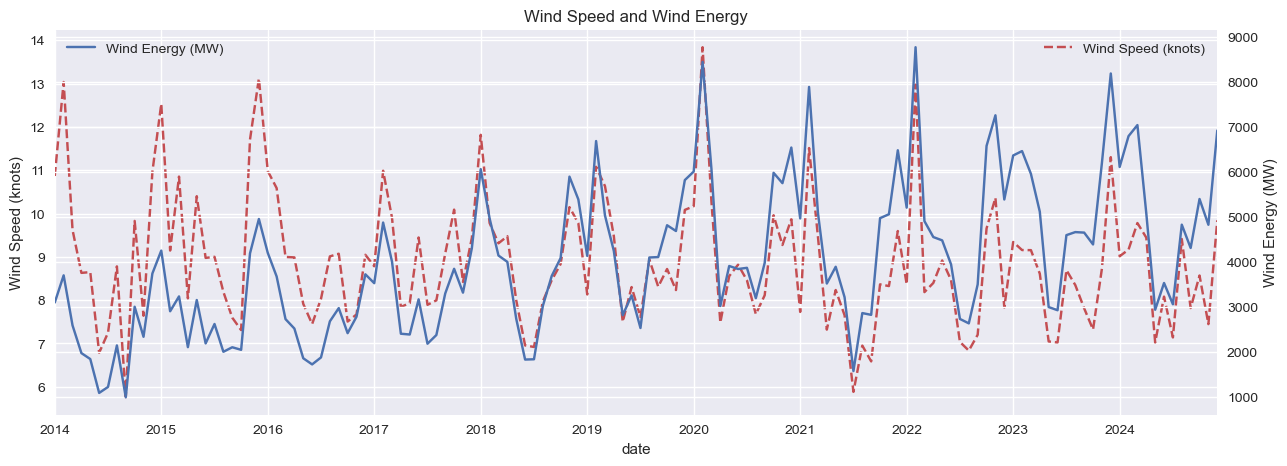

In [120]:
# Plot of Wind Speed and Wind Energy.
fig, ax = plt.subplots(figsize = (15,5))

# Plot Monthly Wind Speed
electricity_weather_monthly['Wind Speed (knots)'].plot(ax=ax, color = '#c44e52', linestyle = 'dashed', label= 'Wind Speed (knots)')
ax.legend()
plt.ylabel('Wind Speed (knots)')

ax2 = ax.twinx()

# Plot Monthly Wind Energy
electricity_weather_monthly['Wind Energy (MW)'].plot(ax= ax2, label= 'Wind Energy (MW)')
ax2.legend(loc = 'upper left')

plt.title('Wind Speed and Wind Energy')
plt.ylabel('Wind Energy (MW)')
plt.show()

Unsurprisingly, there is a close connection between wind speeds and wind energy production. When the wind speed increases, so does wind energy production. 

Since 2018, there appears to be a better output of wind energy for similar wind speeds. From 2019/2020, there is another increase in wind energy production. The wind speeds haven't increased but the output is much larger.  According to [Teagasc](https://www.teagasc.ie/rural-economy/rural-development/diversification/wind-energy/#:~:text=The%20Republic%20of%20Ireland%20now,additional%20463MW%20of%20wind%20capacity), 24 new wind farms built in 2019 with 463 MW of capacity. In [2022, 134 MW of capacity](https://iea-wind.org/about-iea-wind-tcp/members/ireland/) were added. This increase in capacity resulted in higher wind energy production despite the lower wind speeds.

The next plot of wind energy and wind speeds of the yearly averages demonstrates the improvement in output.

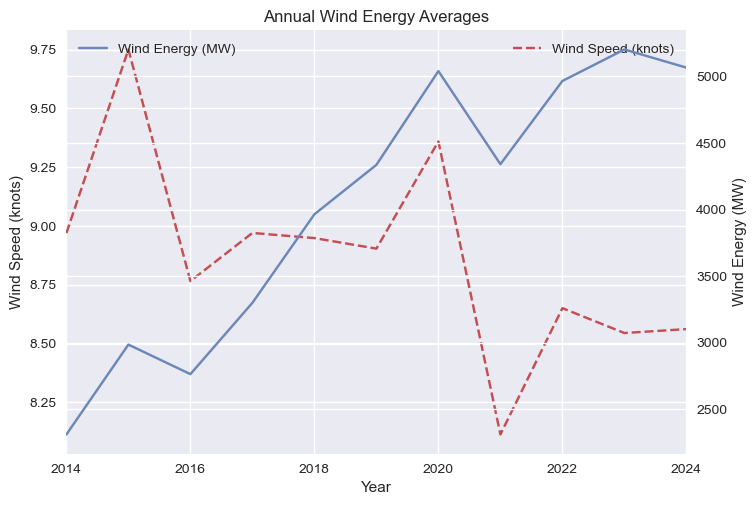

In [121]:
# Plot of Wind Energy and Wind Speed by yearly averages.
fig, ax = plt.subplots()

electricity_weather_yearly['Wind Speed (knots)'].plot(ax=ax, linestyle = 'dashed', color = '#C44E52', label = 'Wind Speed (knots)')
plt.xlabel('Year')
plt.ylabel('Wind Speed (knots)')
plt.legend()

ax2 = ax.twinx()

electricity_weather_yearly['Wind Energy (MW)'].plot(ax= ax2, color = '#6C88B7', label = 'Wind Energy (MW)')
plt.ylabel('Wind Energy (MW)')
plt.title('Annual Wind Energy Averages')
plt.legend()
plt.show()

In 2017, there appears to be a change in the data. Between 2017 and 2019 there is a spike in wind energy, despite the slight decline in wind speed averages. Outside this range the plots are in close alignment with each other. When one increases, the other increases. 

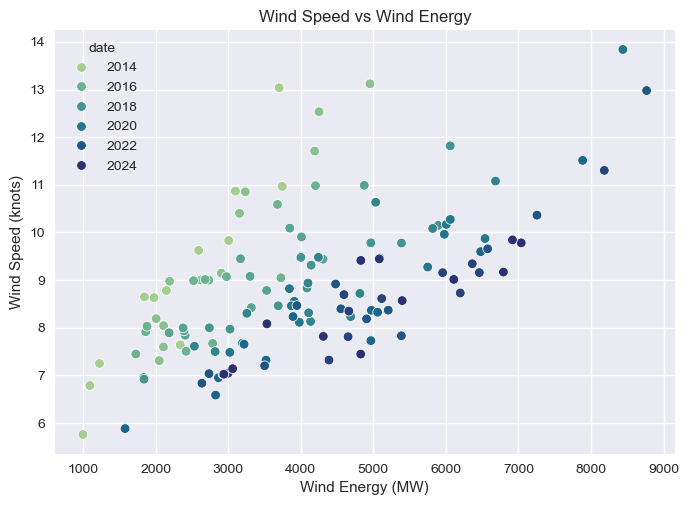

In [122]:
fig, ax = plt.subplots()
sns.scatterplot(data = electricity_weather_monthly, 
                x= 'Wind Energy (MW)', 
                y = 'Wind Speed (knots)', 
                hue= electricity_weather_monthly.index.year,
                palette= 'crest')
plt.title('Wind Speed vs Wind Energy')
plt.show()

Correlation coefficient between wind energy and wind speed is 0.797. 

In [123]:
# Has the correlation coefficient changed? 
correlations = electricity_weather.groupby(electricity_weather.index.year).apply(lambda x: x['Wind Energy (MW)'].corr(x['Wind Speed (knots)']))
correlations = correlations.reset_index(name='correlation')
correlations

,date,correlation
0,2014,0.898165
1,2015,0.909520
2,2016,0.896749
3,2017,0.899880
4,2018,0.891537
5,2019,0.880873
6,2020,0.877169
7,2021,0.886641
8,2022,0.888947
9,2023,0.895022


The correlation coefficient between wind speed and wind energy has remained relatively constant. 

### What is the long term trend in wind speeds?

Weather trends are analysed but not discussed in the Jupyter notebook, [weather_trends.ipynb](weather_trends.ipynb). The CSV file, full_weather.csv was read into Pandas and transformed to create the full_weather dataframe. The weather trends since 1945 were examined. 

The main finding is that wind speeds are decreasing. In 1945, the mean wind speed was 10.70 knots. The mean wind speed almost 80 years later, in 2024, was 8.56 knots. This is a 20% decrease in wind speeds.


![Wind speeds since 1944](plots/Wind_speed_rolling.png)

The wind speeds are higher in winter months.

![Seasonal Wind Speeds](plots/seasonal_wind_speeds.png)

This seasonal decomposition plot clearly shows the trend in declining wind speeds and the seasonality of wind speeds. 

![Seasonal Decomposition](plots/seasonal_windspeed.png)

### Does the improvement in wind energy output in 2017 coincide with the change in the SNSP limit?

In 2017, the SNSP limit changed to 65%. 

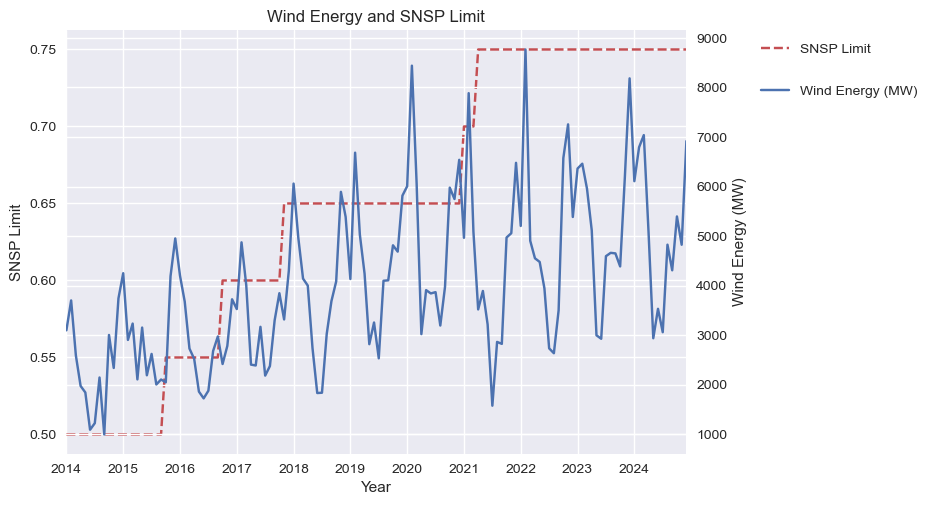

In [124]:
fig, ax = plt.subplots()

electricity_weather_monthly['SNSP'].plot(ax=ax, linestyle = 'dashed', color = '#C44E52', label = 'SNSP Limit')
ax.legend(bbox_to_anchor = (1.1, 1))
plt.xlabel('Year')
plt.ylabel('SNSP Limit')


ax2 = ax.twinx()

electricity_weather_monthly['Wind Energy (MW)'].plot(ax= ax2, label = 'Wind Energy (MW)')

ax2.legend(bbox_to_anchor = (1.1, 0.9))

plt.title('Wind Energy and SNSP Limit')
plt.ylabel('Wind Energy (MW)')
plt.show()

It is difficult to quantify how the increasing SNSP limit has affected the output from wind energy. As the SNSP limit has increased so has the number of wind farms in the country. 

### What percentage of energy comes from wind power?

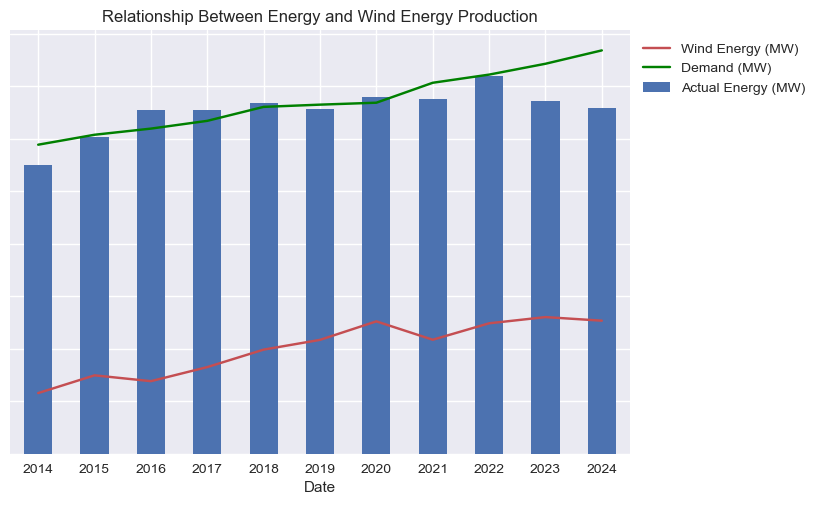

In [125]:
fig, ax = plt.subplots()


ax = electricity_weather_yearly.plot(y = 'Wind Energy (MW)', color = '#C44E52', linestyle = '-', ax = ax, label = 'Wind Energy (MW)', use_index= False)
electricity_weather_yearly['Actual (MW)'].plot(kind = 'bar', label = 'Actual Energy (MW)')
electricity_weather_yearly['Demand (MW)'].plot(ax = ax, color = 'g', label = 'Demand (MW)', use_index = False)
                                                
ax.set_xlabel('Date')
ax.set_xticklabels(electricity_weather_yearly.index.year)

ax.axes.yaxis.set_ticklabels([])
ax.set(ylabel= None)
ax.set_title("Relationship Between Energy and Wind Energy Production")
ax.legend(bbox_to_anchor = (1, 1))

plt.show()

In [126]:
# Add column for % wind energy
electricity_weather_yearly['% Wind Energy'] = (electricity_weather_yearly['Wind Energy (MW)'] / electricity_weather_yearly['Actual (MW)']) * 100

# Add column for % energy deficit
electricity_weather_yearly['% Energy Deficit'] = (electricity_weather_yearly['Demand (MW)'] - electricity_weather_yearly['Actual (MW)']) / electricity_weather_yearly['Actual (MW)'] * 100
electricity_weather_yearly.head(11)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,% Wind Energy,% Energy Deficit
date,,,,,,,,,,,,
2014-12-31,1009.612358,0.143958,83.663824,10.373425,202.467838,8.969831,2309.596804,11001.091553,11767.631735,0.500000,20.994251,6.967856
2015-12-31,1014.334928,0.158265,82.578727,9.749905,207.072672,9.750983,2985.015183,12079.515639,12146.754224,0.512603,24.711381,0.556633
2016-12-31,1014.133200,0.126062,82.708215,10.061733,197.370263,8.765640,2763.018784,13086.686913,12380.604337,0.562568,21.113203,-5.395427
2017-12-31,1014.494323,0.131558,83.605372,10.331381,212.948322,8.970461,3298.931279,13090.570776,12676.343037,0.608356,25.200821,-3.164321
2018-12-31,1012.622821,0.130379,82.380785,10.145537,196.043534,8.948595,3964.443436,13355.889269,13208.212557,0.650000,29.683111,-1.105705
2019-12-31,1011.955885,0.144885,83.076425,10.228975,204.043289,8.903710,4335.926199,13126.490639,13293.019749,0.650000,33.031877,1.268649
2020-12-31,1012.170620,0.155633,82.580167,10.154608,203.890055,9.359723,5040.520036,13598.152493,13367.057662,0.650000,37.067683,-1.699458
2021-12-31,1014.549785,0.128247,83.662798,10.373885,201.268314,8.113170,4340.922717,13499.505708,14125.915753,0.737671,32.156160,4.640244
2022-12-31,1014.075030,0.129677,81.937660,10.643283,202.243589,8.650444,4966.271347,14381.650856,14436.984075,0.750000,34.531998,0.384749


The percentage of energy that wind contributes to the grid has increased from 21% in 2014 to 39% in 2024. 

For 2023 and 2024, 39% of our total energy production came from wind energy. 

The demand for energy has increased every year from 2014. Unfortunately, this has lead to a situation where more electricity is being imported from the Interconnector to meet our energy needs. In 2024, there was a 16.8% deficit between energy requirements and the amount of energy produced. 

### What are the seasonal trends in energy supply and demand?

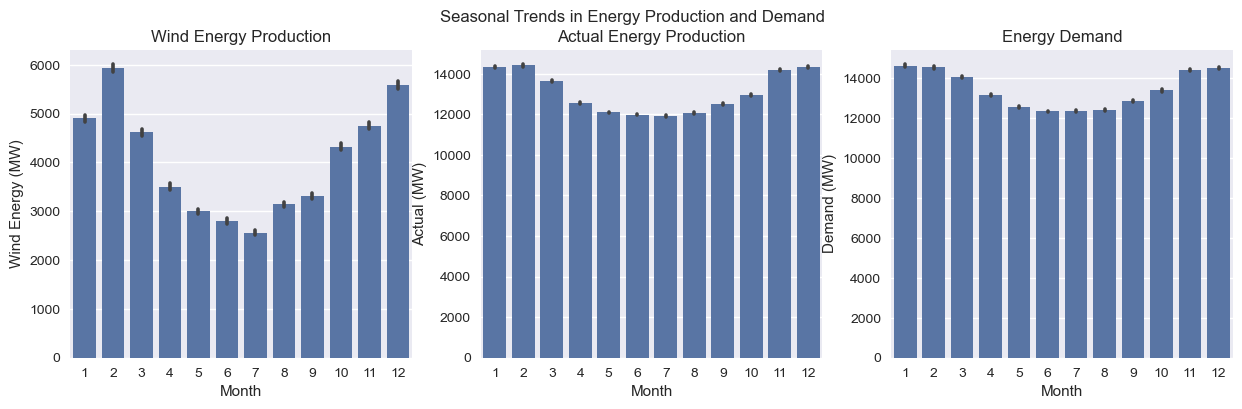

In [127]:
# Monthly Trends
fig, ax = plt.subplots(1, 3, figsize = (15, 4))

sns.barplot(electricity_weather, x = electricity_weather.index.month, y = 'Wind Energy (MW)', ax = ax[0])
ax[0].set_title('Wind Energy Production')
ax[0].set_xlabel('Month')

sns.barplot(electricity_weather, x = electricity_weather.index.month, y = 'Actual (MW)', ax= ax[1])
ax[1].set_title('Actual Energy Production')
ax[1].set_xlabel('Month')


sns.barplot(electricity_weather, x = electricity_weather.index.month, y = 'Demand (MW)', ax= ax[2])
ax[2].set_title('Energy Demand')
ax[2].set_xlabel('Month')

fig.suptitle('Seasonal Trends in Energy Production and Demand')
plt.show()

There is a clear trend of less demand and therefore less electricity generation in the summer months. 

There is relatively strong positive correlation between energy demand and energy supply, with a correlation coefficient of 0.77.

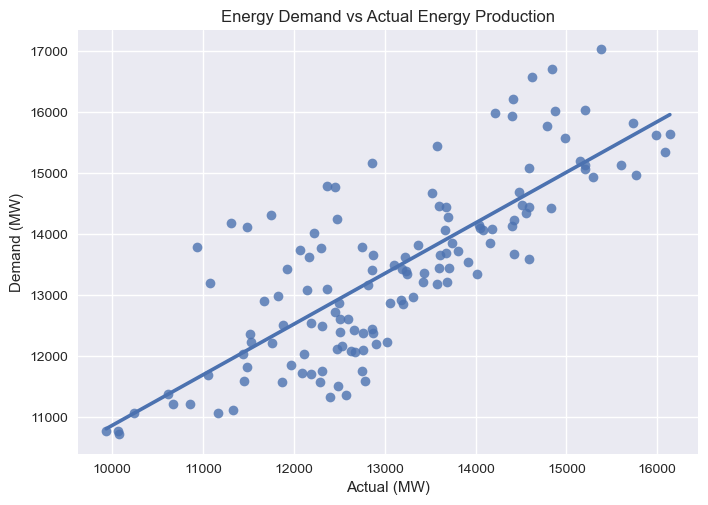

In [128]:
sns.regplot(data= electricity_weather_monthly, x = 'Actual (MW)', y = 'Demand (MW)', ci= None)
plt.title('Energy Demand vs Actual Energy Production')
plt.show()

## Seasonal Analysis

The pattern exhibited by a time series is determined by several components - [the trend, the seasonality and residue](https://otexts.com/fpp2/components.html). Trend, $T_t$ is the long-term increase or decrease in the data. Seasonality, $S_t$ is any periodic changes that occur at regular intervals. It has a fixed and known frequency. The residue, $R_t$ is the remainder that cannot be explained by the trend or seasonality.

Additive: $y_t = T_t + S_t + R_t$ 

Multiplicative: $y_t = T_t × S_t × R_t$

Time series can have either [additive or multiplicative](https://online.stat.psu.edu/stat510/lesson/5/5.1#:~:text=The%20additive%20model%20is%20useful,seasonal%20variation%20increases%20over%20time.) decomposition. In the additive model, the seasonal variation stays relatively constant over time. For the multiplicative model, the seasonal variation increases over time.

The purpose of time series decomposition is to extract these three components from the data. Understanding the underlying patterns in time series is used improve machine learning models and forecast accuracy. 

[statsmodels.tsa](https://www.statsmodels.org/stable/tsa.html) has model classes and functions that are useful for time series analysis. Some of the functions associated with statsmodels.tsa are:

* [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). Plots the raw data, trend, seasonality and residue of the time series. The model parameter must be either additive or multiplicative. 

* [month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot). Seasonal plot of the monthly data.  

* [plot_acf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html). Plots the autocorrelation. 

* [plot_pacf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html). Plots the partial autocorrelation.


plot_acf and plot_pacf are autocorrelation plots. Autocorrelation is a plot between a variable and a lagged version of itself. Autocorrelation is used to determine if past data 
influences future data. Partial autocorrelation is similar but it ignores any data points between the data and the lagged data point. The lags are on the horizontal axis and the 
correlations on the vertical axis. The shaded blue area is the 95% confidence interval and any data points inside it are not statistically significant. 

[Forecasting, Principles and Practices by Rob J Hyndman and George Athanasopoulos](https://otexts.com/fpp2/) was used as a reference for seasonal analysis and forecasting. 

### Monthly Trends


month_plot is a seasonality curve. It groups the data by the months, to show the variation across the year and the variation within each month. The black lines are the mean values for each month. The red line is the average wind speed for that month.

#### Month_plot for Wind Speed

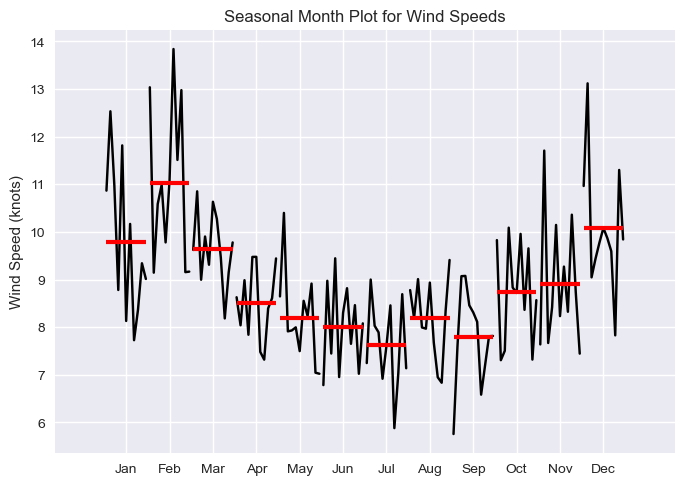

In [129]:
# Monthly Trends in Wind Speed for 2014-2024
month_plot(electricity_weather_monthly['Wind Speed (knots)'], ylabel= 'Wind Speed (knots)')
plt.title('Seasonal Month Plot for Wind Speeds')
plt.show()


Summer months have lower wind speeds than winter months. 

Despite March being noted in [folklore](https://thefadingyear.wordpress.com/2018/03/01/the-weather-of-march-irish-folklore/) for its winds, for the past decade, February is the windiest month. 

This long term seasonal month_plot was created in weather_trends.ipynb. For the long term data, both January, February and December are equally windy. 


![Long Term Month Plot](plots/long_term_month_plot_wind.png)

In the 1950's, December was the windiest month. 

![Fifties](plots/fifties_wind.png)

#### Month_plot for Wind Energy

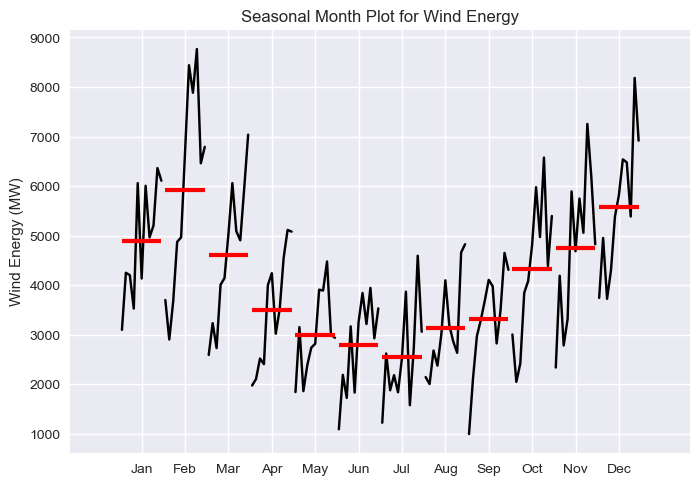

In [130]:
# Month plot for wind energy
month_plot(electricity_weather_monthly['Wind Energy (MW)'], ylabel= 'Wind Energy (MW)')
plt.title('Seasonal Month Plot for Wind Energy')
plt.show()

As expected, since February has been the windiest month for the past decade, the best month for wind energy production is February.

### Autocorrelation Analysis



![Long Term Autocorrelation of wind speeds](plots/acf_windspeed.png)


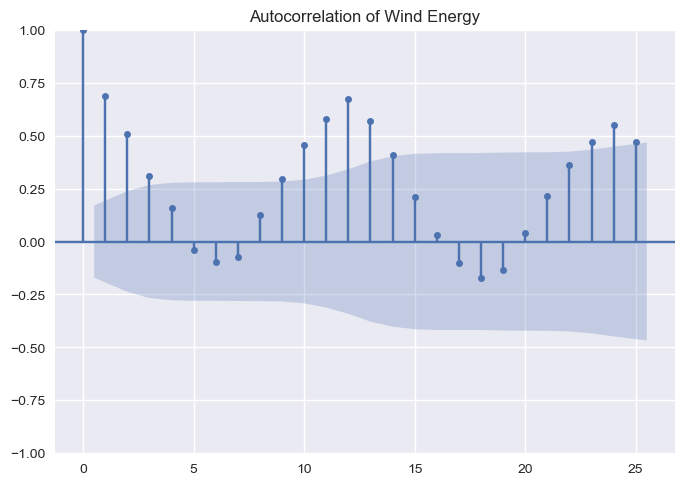

In [131]:
tsaplots.plot_acf(electricity_weather_monthly['Wind Energy (MW)'], lags= 25)
plt.title('Autocorrelation of Wind Energy')
plt.show()

### Seasonal Trends for Wind Energy

Seasonal decomposition analysis shows the trends, seasonal and residual components of a time series.

Seasonal_decompose() is straightforward to use. For this seasonal decomposition analysis, the period is 12 as it is monthly data and they autocorrelation plots show a relationship between the yearly data.

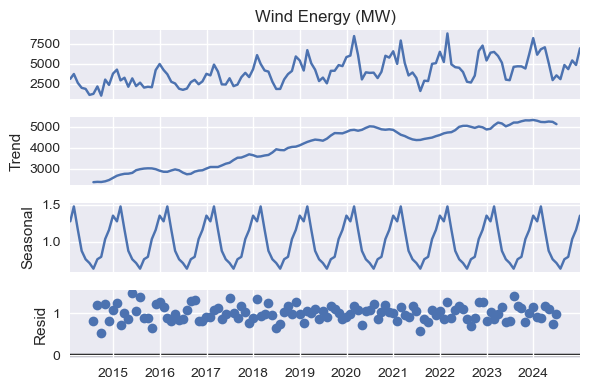

In [132]:
rcParams['figure.figsize'] = 6, 4

decomposition = sm.tsa.seasonal_decompose(electricity_weather_monthly['Wind Energy (MW)'], model= 'mul', period = 12)
fig = decomposition.plot()

In the above plot, the rising trend in wind energy production is obvious, along with its seasonality. More wind energy production in winter than summer months. 

So far, we have only looked at the seasonal winter and summer trends. But what about daily trends? Seasonal_decompose() does not take daily seasonality into account. [MSTL_decompose](https://www.statsmodels.org/dev/examples/notebooks/generated/mstl_decomposition.html) can be used to capture daily seasonality. MSTL stands for multiple seasonal-trend decomposition. It displays any daily or weekly seasonality. 

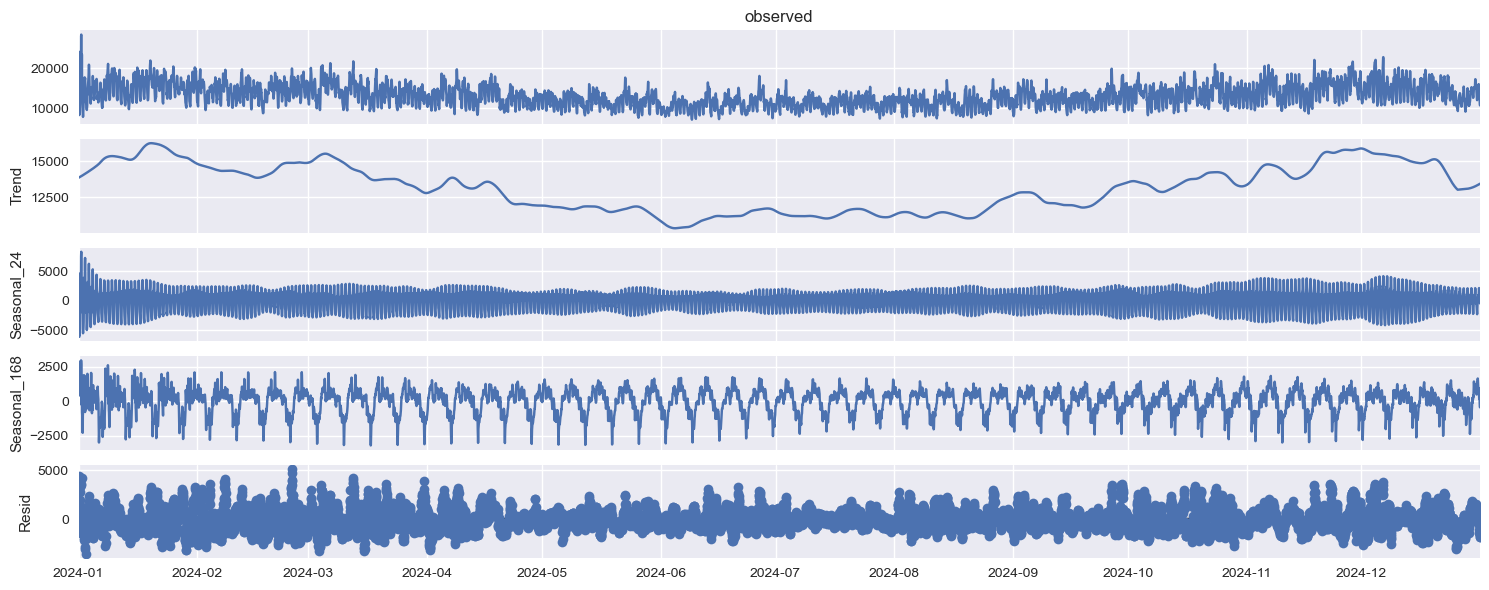

In [133]:
rcParams['figure.figsize'] = 15, 6

mstl = MSTL(electricity_weather.loc['2024': ]['Actual (MW)'], periods = [24, 24 *7])
res = mstl.fit()
ax = res.plot()

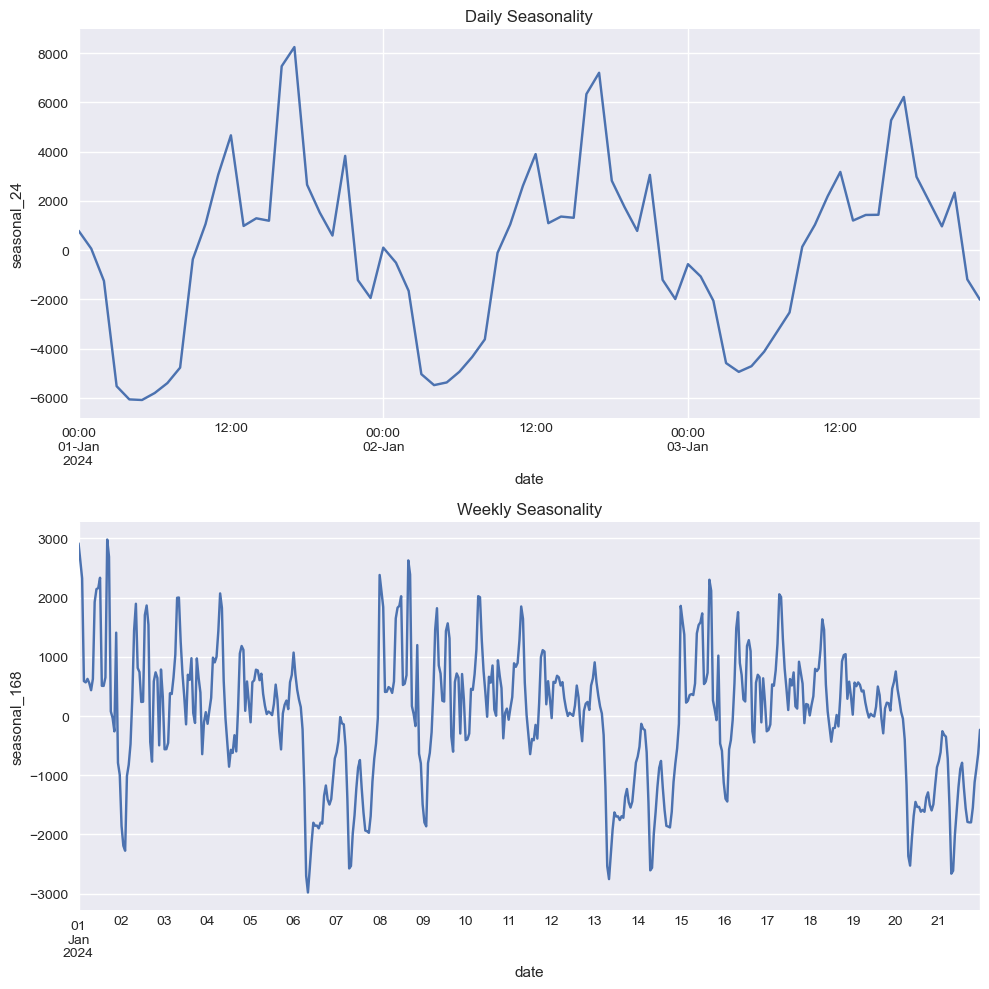

In [134]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10])

# Plot daily seasonality
res.seasonal["seasonal_24"].iloc[:24*3].plot(ax=ax[0])
ax[0].set_ylabel("seasonal_24")
ax[0].set_title("Daily Seasonality")

# Plot weekly seasonality
res.seasonal["seasonal_168"].iloc[:24*7*3].plot(ax=ax[1])
ax[1].set_ylabel("seasonal_168")
ax[1].set_title("Weekly Seasonality")

plt.tight_layout()

MSTL has captured the variations in energy production throughout the day and during the week. Energy production decreases at night and at the weekends. The 6th and 7th of January 2024 were a Saturday and Sunday.

## Machine Learning

Aim: Can the weather data be used to predict the wind energy output?

Only the weather columns and the wind energy columns will be used for this machine learning project. 

In [135]:
# Drop columns
electricity_weather.drop(['Actual (MW)', 'Demand (MW)', 'SNSP'], axis= 1, inplace= True)
electricity_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW)
date,,,,,,,
2014-01-01 00:00:00,988.63,0.02,83.17,5.52,189.17,11.58,3907.0
2014-01-01 01:00:00,988.32,0.01,85.67,5.03,186.67,10.17,3657.0
2014-01-01 02:00:00,987.72,0.03,87.17,5.09,170.83,9.17,3754.0
2014-01-01 03:00:00,986.86,0.15,87.75,5.11,165.00,9.33,3645.0
2014-01-01 04:00:00,985.55,0.20,89.33,5.21,157.50,9.75,3660.0


In [136]:
# Create features
X = electricity_weather.drop('Wind Energy (MW)', axis= 1)

In [137]:
# Create target
y = electricity_weather['Wind Energy (MW)']

In [138]:
print(X.shape, y.shape)

(96432, 6) (96432,)


For machine learning it is important to split the data into a training set and test set. Usually the data is split into training and test sets using random sampling. The training set is used to fit a machine learning model and the test set is used to evaluate the model. Test set data should not be exposed to the model until testing time to prevent data leakage. However, for time series data it is important to keep the data in chronological order to prevent data leakage.

There are a number of ways to split the data for time series analysis:

* [train_test_split with shuffle = false](https://stackoverflow.com/questions/74025273/is-train-test-splitshuffle-false-appropriate-for-time-series). The parameter of shuffle = False is very important as otherwise that data will be shuffled. 

* [sklearn.model_selection.TimeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split). TimeSeriesSplit is a variation of k-fold cross-validation. It returns successive training sets that are supersets of those that come before them.

* [iloc or loc](https://pandas.pydata.org/docs/user_guide/indexing.html) to split the data into training and test set. 

These three methods will be used to split the data into training and test sets.

__Reference__

[How to Backtest Machine Learning Models for Time Series Forecasting](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)

### Linear Regression Model

To start with I will create a linear regression model on the full data set and measure its performance on the test data. 

[$R^2$](https://statisticsbyjim.com/regression/interpret-r-squared-regression/) quantifies how well the model explains the variability in the target variable. A value of 1 indicates a perfect fit, zero indicates that the model does not fit the data. A discrepancy between the $R^2$ for the test and training data can indicate if the model is overfitting the training data and does not generalise well to the test data.

The root mean square error (RMSE) measures how far the predicted values are from the actual observed values. 

In [139]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False)

reg = LinearRegression()

reg.fit(X_train, y_train)
y_predictions = reg.predict(X_test)

# Calculate R-squared
score = r2_score(y_test, y_predictions)
print(f'R squared: {score:.3f}')

# Root mean squared error, measured in units of target variable squared. 
rmse = root_mean_squared_error(y_test, y_predictions)
print(f'RMSE: {rmse:.3f}')


R squared: 0.514
RMSE: 2556.188


This linear regression model, has an $R^2$ value of 0.51 which is a reasonable starting point.

In the Udemy course, [Python for Time Series Analysis](https://www.udemy.com/course/python-for-time-series-data-analysis/) it stated that the size of the data set is important and to consider the effect that older data has on the model. From the information acquired so far, excluding data prior to 2019 could improve the model. 

In [140]:
# Select data from 2019 - 2024
data_2019_onwards = electricity_weather.loc['2019' : ]
data_2019_onwards.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW)
date,,,,,,,
2019-01-01 00:00:00,1035.76,0.03,83.50,9.26,241.67,6.17,2373.0
2019-01-01 01:00:00,1035.63,0.04,84.08,9.08,239.17,6.00,2410.0
2019-01-01 02:00:00,1035.71,0.04,84.08,9.03,240.00,5.67,2030.0
2019-01-01 03:00:00,1035.95,0.04,83.25,9.08,226.67,6.00,1839.0
2019-01-01 04:00:00,1036.13,0.02,84.17,9.01,237.50,6.00,1419.0


In [141]:
# Create feature and target variables.
X = data_2019_onwards.drop('Wind Energy (MW)', axis= 1)
y = data_2019_onwards['Wind Energy (MW)']

In [142]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False)

reg = LinearRegression()

reg.fit(X_train, y_train)
y_predictions = reg.predict(X_test)

# Evaluate R-squared for test set
score = r2_score(y_test, y_predictions)
print(f'R squared: {score:.3f}')

# Root mean squared error, measured in units of target variable squared. 
rmse = root_mean_squared_error(y_test, y_predictions)
print(f'RMSE: {rmse:.3f}')

R squared: 0.765
RMSE: 1791.516


As wind energy has an exponential distribution, the use of [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) in the preprocessing step could improve the model. As stated in this [blog](https://www.yourdatateacher.com/2021/04/21/when-and-how-to-use-power-transform-in-machine-learning/), PowerTransformer is useful when dealing with skewed features and it maps data to a normal distribution, as shown in this scikit-learn [documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py). The default method is the 'yeo-johnson' method, which works with positive and negative values. The other method is the box-cox method, which is strictly for positive values.

The [Pipeline](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html) module will also be used here. Pipeline allows the user to apply a list of transformers to preprocess the data and to conclude with the model for machine learning. 

In [143]:
# Linear regression with power transformer preprocessing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=False)

# Create pipeline
pipeline = Pipeline([('power', PowerTransformer()),
                   ('reg', LinearRegression())])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Generate y predictions
y_predictions = pipeline.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_predictions)
print(f'R_squared: {score:.3f}')

rmse = root_mean_squared_error(y_test, y_predictions)
print(f'RMSE: {rmse:.3f}')

R_squared: 0.810
RMSE: 1610.486


Excluding data prior to 2019 improved the model performance from 0.51 to 0.76, with RMSE error reducing from 639 MW to 447 MW. 

The model was improved further with the use of PowerTransformer from sklearn.preprocessing. The final $R^2$ was 0.81. 

### Decision Tree Model

For tree base models transformation and scaling are not typically required. Decisions trees do not assume a linear relationship.

This YouTube video, [Time Series Forecasting with XGBoost](https://www.youtube.com/watch?v=vV12dGe_Fho&feature=youtu.be) and it's accompanying [kaggle notebook](https://www.kaggle.com/code/robikscube/pt2-time-series-forecasting-with-xgboost/notebook), were used as references in the use of [TimeSeriesSplit](https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). 

The linear regression model will fit the model to each fold created by TimeSeriesSplit. 

__References__

[YouTube, Decision Trees Explained: Introduction to Decision Trees](https://www.youtube.com/watch?v=7YTeMIq6-9s)

In [144]:
tss = TimeSeriesSplit(n_splits = 5)

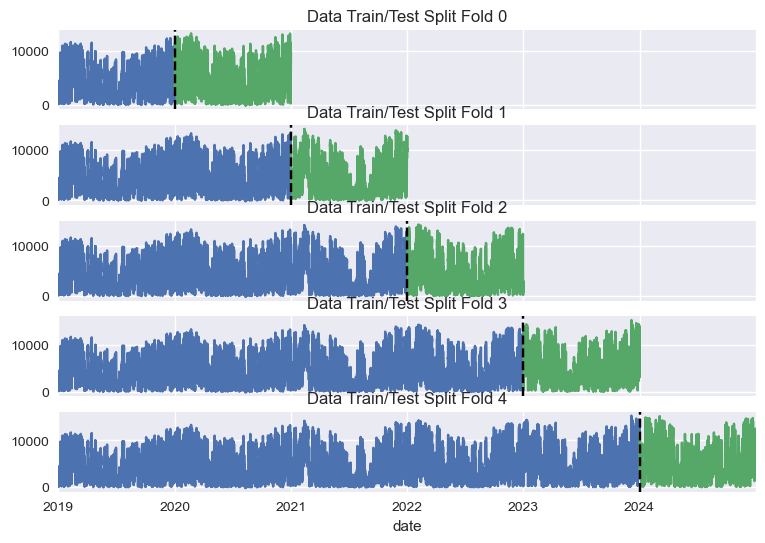

In [145]:
# Visualise the folds created by TimeSeriesSplit
fig, axs = plt.subplots(5, 1, figsize=(9, 6), sharex=True)

fold = 0

for train_idx, val_idx in tss.split(X):
    train = data_2019_onwards.iloc[train_idx]
    test = data_2019_onwards.iloc[val_idx]
    train['Wind Energy (MW)'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Wind Energy (MW)'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [146]:
# Instantiate empty lists to store the results of each fold
predictions = []
scores = []
r_squares = []


for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    dtr = DecisionTreeRegressor(max_depth = 3)
    
    # Fit the model
    dtr.fit(X_train, y_train)

    # Prediction
    y_prediction = dtr.predict(X_test)
    predictions.append(y_prediction)

    # Evaluate with RMSE
    rmse = root_mean_squared_error(y_test, y_prediction)
    scores.append(rmse)

    # Evaluate r_squared
    r_squared = dtr.score(X_test, y_test)
    r_squares.append(r_squared)

In [147]:
print(f'R_squared across folds {np.mean(r_squares):0.4f}')
print(f'R_squared scores:{r_squares}')

R_squared across folds 0.7910
R_squared scores:[0.8012047620514513, 0.8005857938390448, 0.8083374711569741, 0.7888940237295403, 0.7559058486988789]


In [148]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 1629.1040
Fold scores:[1523.7437849965254, 1533.2218698669374, 1619.6030906619824, 1687.2826556656069, 1781.6685295108546]


In [149]:
print("Predictions: {},\nActual Values: {}".format(y_prediction[:5].round(2), y_test[:5].values))

Predictions: [8808.43 8808.43 7200.95 8808.43 7200.95],
Actual Values: [11090. 11532. 11817. 11431. 11024.]


In [150]:
r_square_train = dtr.score(X_train, y_train)
print(f'R_squared for the training set is {r_square_train:0.4f}')

R_squared for the training set is 0.8142


Using a DecisionTreeRegressor created a model with R-squared value of 0.79. 

As the size of the training set increased, the value of R-squared decreased from 0.80 to 0.75. 

With decision trees it is possible to view how the [features influenced the model](https://www.geeksforgeeks.org/understanding-feature-importance-and-visualization-of-tree-models/) and to view the decision tree.  

In [151]:
importances = dtr.feature_importances_
feature_names = X.columns

In [152]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.head()

,Feature,Importance
5,Wind Speed (knots),0.960895
2,Relative Humidity (%),0.039105
0,Pressure (hPa),0.000000
1,Rain (mm),0.000000
3,Temp (°C),0.000000


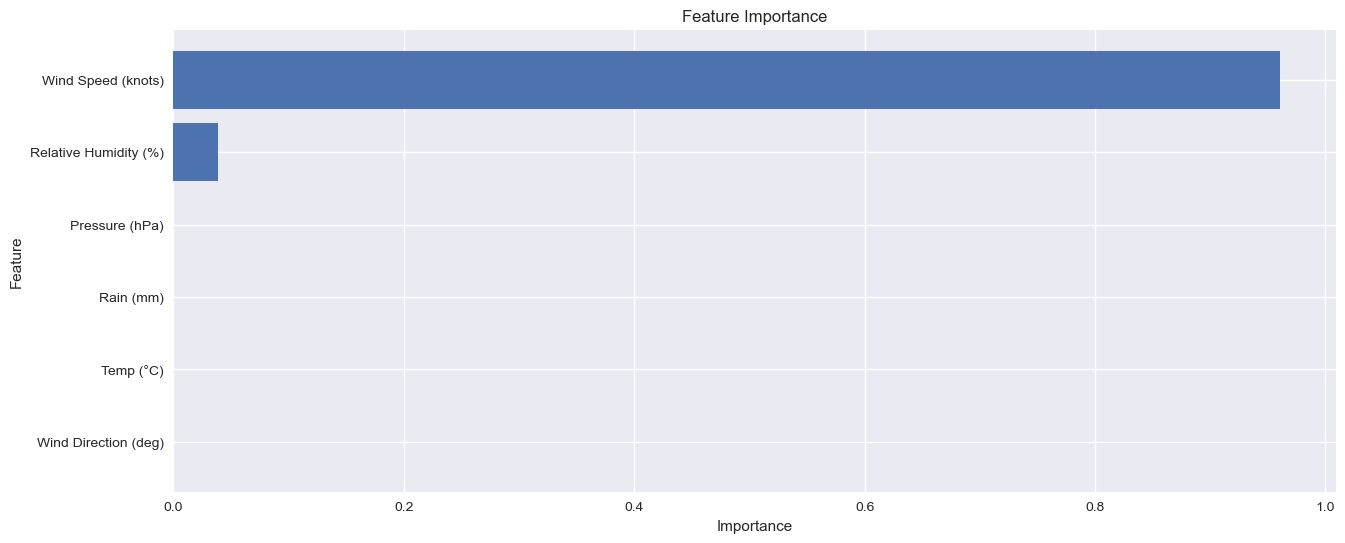

In [153]:
# Plot the feature importances
plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

To predict the wind energy output, only two features, the wind speed and the relative humidity are considered important. Wind speed has the greatest influence.

Decision tree is visualized using the [plot_tree function](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.plot_tree.html). 


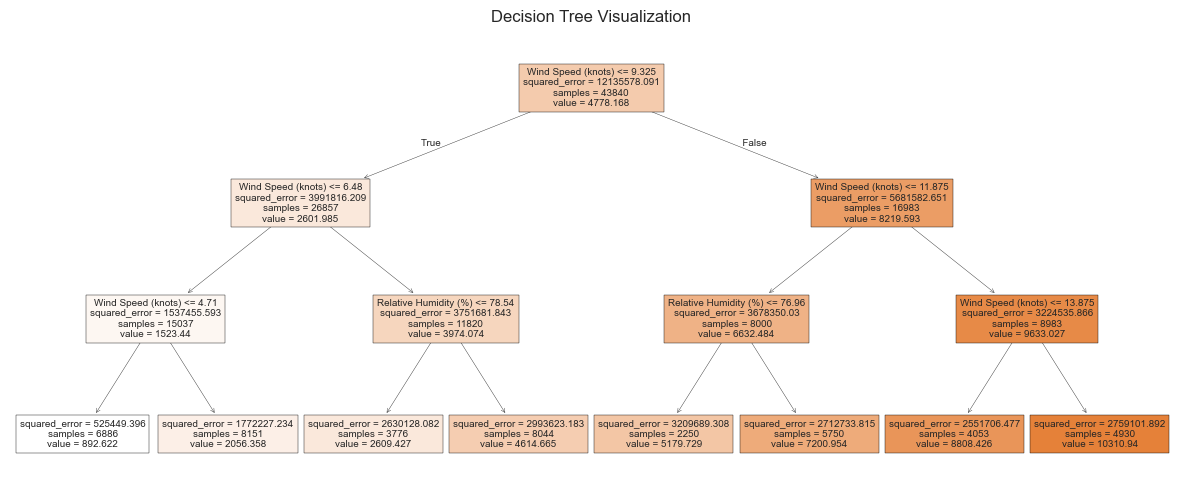

In [154]:
# Plot the decision tree
plt.figure()
plot_tree(dtr, filled=True, feature_names= X_train.columns, class_names= y_train)
plt.title('Decision Tree Visualization')
plt.show()

## Forecasting

Aim: Predict wind energy output for the 24 months.

[Exponential smoothing](https://otexts.com/fpp2/expsmooth.html) is used for forecasting data. Forecasts produced with exponential smoothing assign more weight to recent observations and less weight to older ones. It is useful for data with trends or patterns that change over time. There are three types of exponential smoothing: 
* simple exponential smoothing (SES). Suitable for data with no clear trend or seasonal behaviour. 
* double exponential smoothing (DES). Takes trends in the data into account. DES is also known as Holt's trend method.
* triple exponential smoothing (TES). Takes trends and seasonality in the data into account. TES is also known as Holt-Winters' seasonal method. 


__References__
[udemy.com, Python for Time Series Analysis](udemy.com/course/python-for-time-series-data-analysis)

[YouTube, Kishan Manani - Feature Engineering for Time Series Forecasting | PyData London 2022](https://www.youtube.com/watch?v=9QtL7m3YS9I)

### Building a Model on Weekly Data

In [155]:
# Resample weekly
electricity_weather_weekly = electricity_weather.resample('W').mean()
electricity_weather_weekly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW)
date,,,,,,,
2014-01-05,981.688250,0.279833,85.699000,5.875500,198.610667,12.895833,3795.225000
2014-01-12,1000.566964,0.208393,87.112440,6.125952,200.878512,10.759821,3083.863095
2014-01-19,989.108810,0.156310,90.518631,5.101607,201.225179,7.054643,1696.994048
2014-01-26,1003.922976,0.298631,85.699286,6.752857,228.373036,12.373810,3767.761905
2014-02-02,987.807917,0.300238,84.535595,5.553155,226.255060,13.818988,3979.797619


In [156]:
# Fit the Exponential Smoothing model. Trend as multiplicative
electricity_weather_weekly['TESmul52'] = ExponentialSmoothing(electricity_weather_weekly['Wind Energy (MW)'], trend= 'mul', seasonal= 'mul', seasonal_periods= 52).fit().fittedvalues
electricity_weather_weekly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),TESmul52
date,,,,,,,,
2014-01-05,981.688250,0.279833,85.699000,5.875500,198.610667,12.895833,3795.225000,3304.877647
2014-01-12,1000.566964,0.208393,87.112440,6.125952,200.878512,10.759821,3083.863095,3014.118578
2014-01-19,989.108810,0.156310,90.518631,5.101607,201.225179,7.054643,1696.994048,3554.123791
2014-01-26,1003.922976,0.298631,85.699286,6.752857,228.373036,12.373810,3767.761905,2889.477123
2014-02-02,987.807917,0.300238,84.535595,5.553155,226.255060,13.818988,3979.797619,4380.022186


In [157]:
# Fit the Exponential Smoothing model. Trend as additive
electricity_weather_weekly['TESadd52'] = ExponentialSmoothing(electricity_weather_weekly['Wind Energy (MW)'], trend= 'add', seasonal= 'add', seasonal_periods= 52).fit().fittedvalues
electricity_weather_weekly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),TESmul52,TESadd52
date,,,,,,,,,
2014-01-05,981.688250,0.279833,85.699000,5.875500,198.610667,12.895833,3795.225000,3304.877647,3571.636549
2014-01-12,1000.566964,0.208393,87.112440,6.125952,200.878512,10.759821,3083.863095,3014.118578,3165.612471
2014-01-19,989.108810,0.156310,90.518631,5.101607,201.225179,7.054643,1696.994048,3554.123791,3895.307425
2014-01-26,1003.922976,0.298631,85.699286,6.752857,228.373036,12.373810,3767.761905,2889.477123,3110.430458
2014-02-02,987.807917,0.300238,84.535595,5.553155,226.255060,13.818988,3979.797619,4380.022186,4954.685552


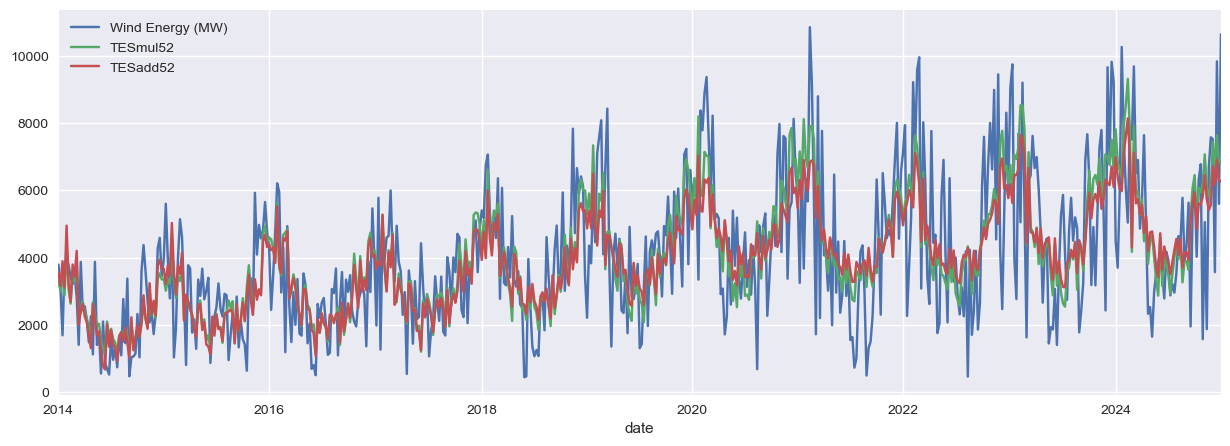

In [158]:
# Plot the results to compare the values with the predicted values
electricity_weather_weekly[['Wind Energy (MW)', 'TESmul52', 'TESadd52']].plot(figsize = (15,5))
plt.show()

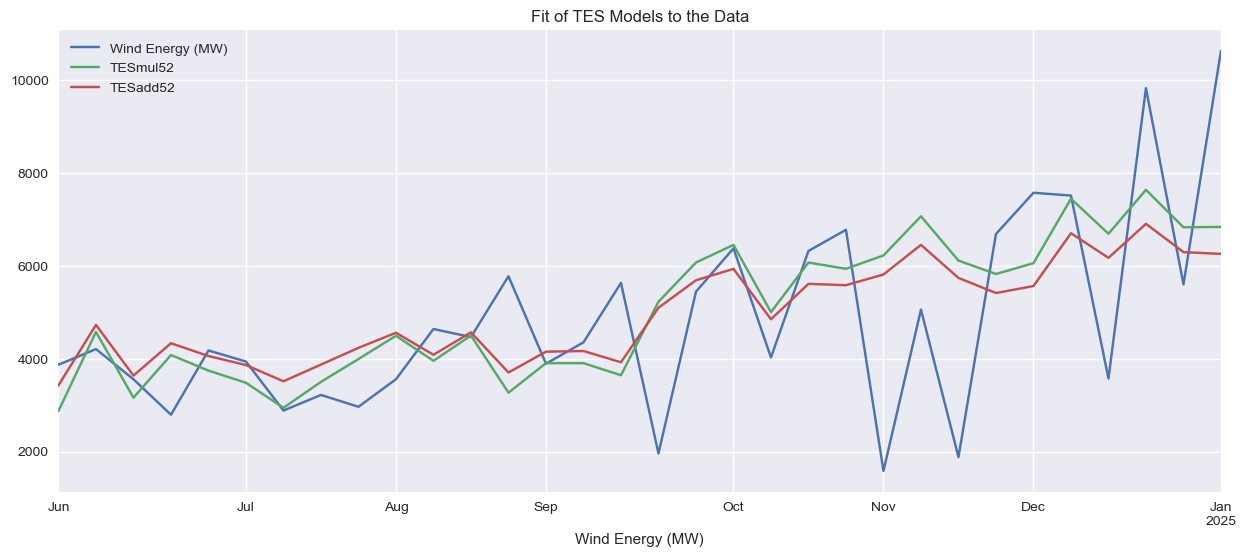

In [159]:
# Filter the plot to view data from June 2024
electricity_weather_weekly.loc['2024-06' :][['Wind Energy (MW)', 'TESmul52', 'TESadd52']].plot()

plt.title('Fit of TES Models to the Data')
plt.xlabel('Wind Energy (MW)')
plt.show()

The Holts-Winters model is not a good fit for the weekly data. It is missing the peaks and the dips in the real data. 

Attempt now on the monthly data. 

### Building a Model on Monthly Data

In [160]:
# Multiplicative Model
electricity_weather_monthly['TESmul12'] = ExponentialSmoothing(electricity_weather_monthly['Wind Energy (MW)'], trend= 'mul', seasonal= 'mul', seasonal_periods= 12).fit().fittedvalues
electricity_weather_monthly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12
date,,,,,,,,,,,
2014-01-31,993.884435,0.244180,87.123763,5.875753,211.225417,10.867594,3098.799731,11672.151882,12904.573925,0.5,3401.539647
2014-02-28,988.311429,0.275030,84.325030,5.749256,212.415804,13.037649,3701.735119,11828.928571,12989.111607,0.5,3117.310604
2014-03-31,1013.142648,0.122782,84.740054,7.045712,202.654597,9.622581,2591.403226,11519.604839,12373.458333,0.5,2768.963450
2014-04-30,1012.485069,0.075319,80.475625,9.921458,176.797472,8.629181,1975.644444,10615.762500,11376.001389,0.5,2151.693444
2014-05-31,1014.004167,0.135027,83.432272,11.358602,200.795336,8.646425,1844.071237,10240.799731,11067.923387,0.5,2036.165491


In [161]:
# Additive Model
electricity_weather_monthly['TESadd12'] = ExponentialSmoothing(electricity_weather_monthly['Wind Energy (MW)'], trend= 'add', seasonal= 'add', seasonal_periods= 12).fit().fittedvalues
electricity_weather_monthly.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12,TESadd12
date,,,,,,,,,,,,
2014-01-31,993.884435,0.244180,87.123763,5.875753,211.225417,10.867594,3098.799731,11672.151882,12904.573925,0.5,3401.539647,3744.445738
2014-02-28,988.311429,0.275030,84.325030,5.749256,212.415804,13.037649,3701.735119,11828.928571,12989.111607,0.5,3117.310604,3310.326747
2014-03-31,1013.142648,0.122782,84.740054,7.045712,202.654597,9.622581,2591.403226,11519.604839,12373.458333,0.5,2768.963450,2754.097837
2014-04-30,1012.485069,0.075319,80.475625,9.921458,176.797472,8.629181,1975.644444,10615.762500,11376.001389,0.5,2151.693444,1961.622732
2014-05-31,1014.004167,0.135027,83.432272,11.358602,200.795336,8.646425,1844.071237,10240.799731,11067.923387,0.5,2036.165491,1721.761530


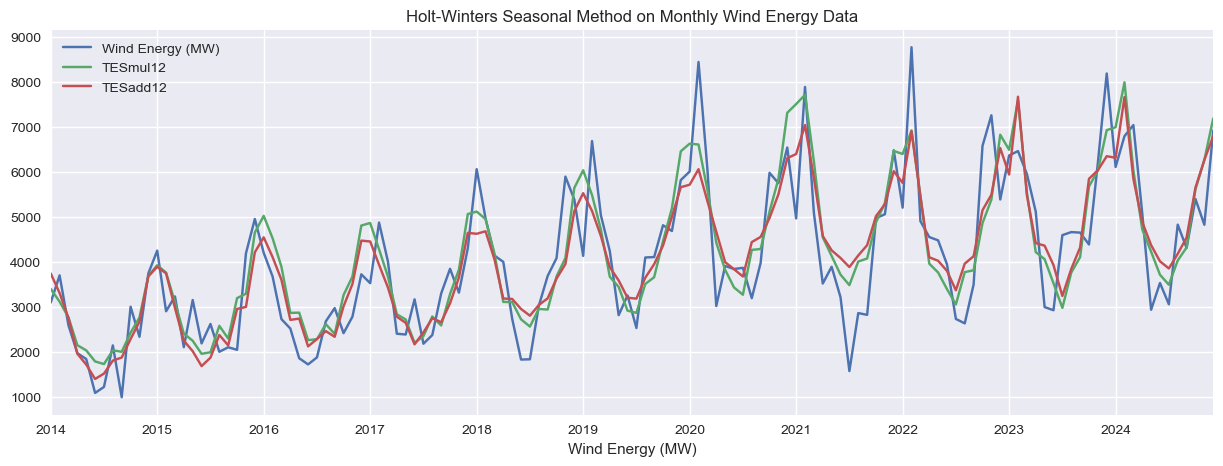

In [162]:
# Plot the data
electricity_weather_monthly[['Wind Energy (MW)', 'TESmul12', 'TESadd12']].plot(figsize = (15,5))

plt.title('Holt-Winters Seasonal Method on Monthly Wind Energy Data')
plt.xlabel('Wind Energy (MW)')
plt.show()

The model is a better fit on the monthly data. The multiplicative model, TESmul12 appears to be a better fit. 

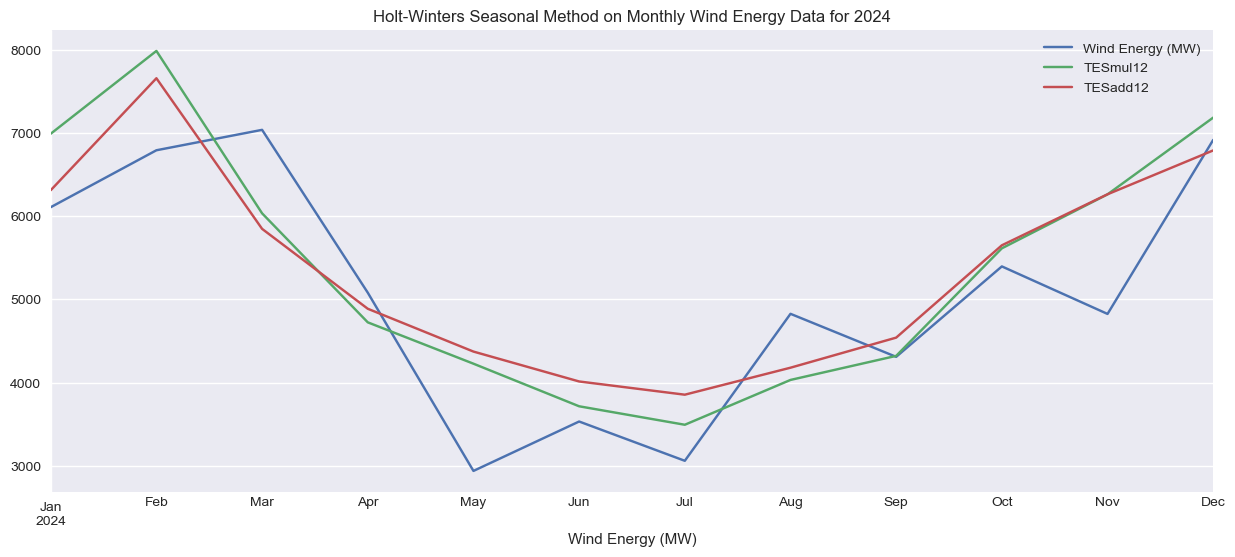

In [163]:
# Filter the data
electricity_weather_monthly.loc['2024'][['Wind Energy (MW)', 'TESmul12', 'TESadd12']].plot()

plt.title('Holt-Winters Seasonal Method on Monthly Wind Energy Data for 2024')
plt.xlabel('Wind Energy (MW)')
plt.show()

### Create Wind Energy Forecasting Model

In [164]:
# Split the data by index
train_data = electricity_weather_monthly.iloc[:105]
train_data.tail()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12,TESadd12
date,,,,,,,,,,,,
2022-05-31,1016.039449,0.090255,79.889718,12.200094,217.908831,8.915941,4478.810484,13223.797043,13631.376344,0.75,3765.012938,4025.346920
2022-06-30,1013.658000,0.132264,79.760944,13.508181,210.671319,8.463111,3945.558333,13103.927778,13493.944444,0.75,3396.336808,3800.742363
2022-07-31,1020.932540,0.056183,80.869637,15.922742,231.394153,7.034059,2734.315860,13239.781586,13392.494624,0.75,3056.008159,3370.636967
2022-08-31,1018.164234,0.067984,77.941720,16.012083,204.429906,6.833858,2636.064516,13593.166667,13442.108199,0.75,3773.593838,3961.907102
2022-09-30,1013.521264,0.156681,82.980403,13.552903,211.871472,7.199708,3501.095833,13610.580556,13655.669444,0.75,3815.237048,4127.227482


In [165]:
# Create test data
test_data = electricity_weather_monthly.iloc[105:]
test_data.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots),Wind Energy (MW),Actual (MW),Demand (MW),SNSP,TESmul12,TESadd12
date,,,,,,,,,,,,
2022-10-31,1007.342581,0.251989,85.435645,12.211022,187.829247,9.655121,6575.942204,14184.860215,14083.419355,0.75,4861.613945,5148.319860
2022-11-30,1000.081611,0.216708,85.898792,9.182306,197.166569,10.362319,7255.269444,15598.773611,15139.334722,0.75,5382.914979,5490.253213
2022-12-31,1008.167715,0.154798,87.706196,4.587298,177.023898,7.829032,5386.091398,15736.282258,15824.188172,0.75,6824.048191,6527.201842
2023-01-31,1011.372124,0.154382,86.325524,6.333038,220.655430,9.342446,6363.130376,15202.286290,16047.641129,0.75,6490.041865,5940.984150
2023-02-28,1026.851920,0.054911,83.222113,7.796845,201.020685,9.156071,6460.945685,14980.078869,15572.897321,0.75,7588.829395,7667.580325


In [166]:
# Fit the model
fitted_model = ExponentialSmoothing(train_data['Wind Energy (MW)'], trend = 'mul',seasonal= 'mul', seasonal_periods=12).fit()

In [167]:
# Generate predictions
test_predictions = fitted_model.forecast(27).rename('Wind Energy Forecast')

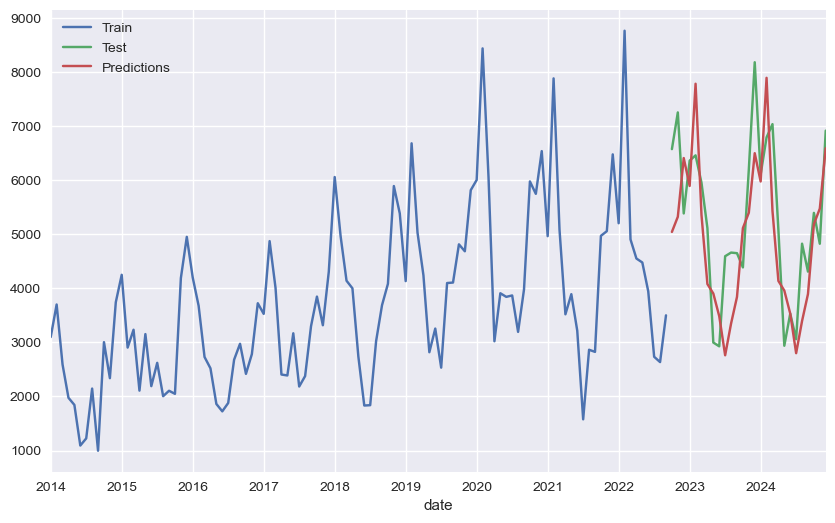

In [168]:
train_data['Wind Energy (MW)'].plot(legend = True, label = 'Train', figsize= (10, 6))
test_data['Wind Energy (MW)'].plot(legend= True, label = 'Test')
test_predictions.plot(legend= True, label = 'Predictions')
plt.show()

In [169]:
# Calculate R-squared
r2_score(test_data['Wind Energy (MW)'], test_predictions)

0.4479368059797456

In [170]:
MAE = mean_absolute_error(test_data['Wind Energy (MW)'], test_predictions)
MAE

912.3087383723766

In [171]:
RMSE = root_mean_squared_error(test_data['Wind Energy (MW)'],test_predictions)
RMSE

1053.8650953925235

The model is capturing the peaks and troughs in the data, but the $R^2$ values is only 0.44, and the RMSE is 265 MW.

Forecasting data is done on the full data set. 

In [172]:
# Create model for forecasting
final_model = ExponentialSmoothing(electricity_weather_monthly['Wind Energy (MW)'], trend = 'mul', seasonal= 'mul', seasonal_periods= 12).fit()

In [173]:
# 24 month forecast
forecast_predictions = final_model.forecast(24)

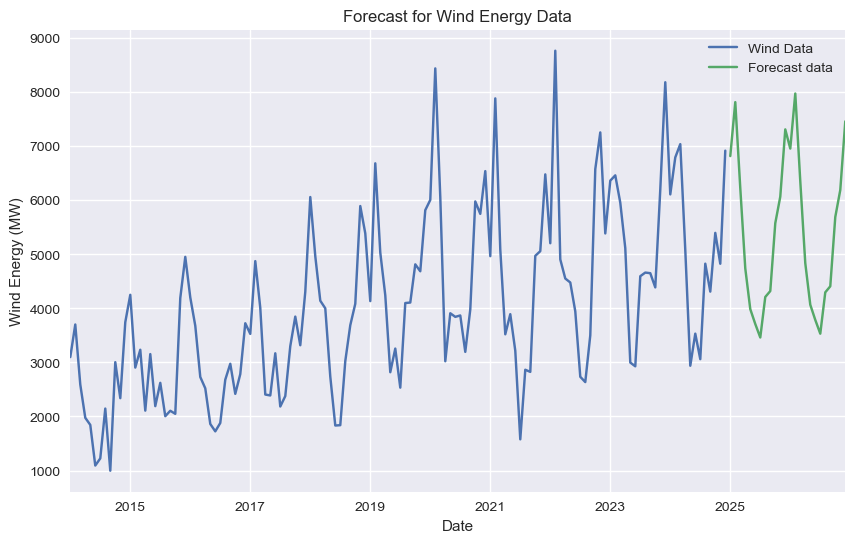

In [174]:
# Plot of Forcast 
electricity_weather_monthly['Wind Energy (MW)'].plot(figsize=(10, 6), label = 'Wind Data')
forecast_predictions.plot(label = 'Forecast data')

plt.legend()
plt.title('Forecast for Wind Energy Data')
plt.xlabel('Date')
plt.ylabel('Wind Energy (MW)')
plt.show()

This model is a very simplistic model. It has generated a two year forecast, but as the $R^2$ for the model was only 0.44, there are probably other methods that give a better fit. It has identified the yearly seasonality but a more complex model would give a better forecast. If I had more time to research forecasting models I would have attempted an ARIMA model or perhaps attempted to forecast with Facebook's Prophet like this Kaggle notebook, [Time series forecasting with prophet](https://www.kaggle.com/code/robikscube/time-series-forecasting-with-prophet).

## Summary

As mentioned in the introduction, one of the aims of the Climate Action plan is that 80% of Ireland's energy comes from renewable sources. Currently approx 40% of our energy is from wind energy. Considering that it has taken 10 years to increase wind energy production from 21% to 39%, this target of 80% in only 5 years is very unrealistic. There are plans for offshore wind farms but those targets are wildly unrealistic too, [5 GW of offshore power installed by 2030](https://www.thejournal.ie/offshore-wind-farm-ireland-2030-targets-6457011-Aug2024/).

Energy production has daily and seasonal trends in line with energy demands. Energy production is reduced at night and at weekends. There are also larger seasonal trends. During the summer energy production is lower than during the winter months.  

Wind speed and relative humidity are the weather factors that influence wind energy output. Rain, air pressure and temperature have no influence on wind energy production. The wind direction has no effect as the head of the turbine is rotated to its optimal position depending on wind direction. 

If the trend of declining wind speeds continues, this will affect wind energy output. There has been a 20% decrease in mean wind speeds since 1945. Since 2014, for 15.8% of the time wind energy production was below 200 MW. It is possible to create a machine learning model to predict wind speeds based on weather data. 

## References

[SEAI First Look Renewable Energy in Ireland report](https://www.seai.ie/sites/default/files/data-and-insights/seai-statistics/key-publications/renewable-energy-in-ireland/First-Look-Renewable-Energy-in-Ireland-Report.pdf)

[Green collective](https://www.greencollective.io/)

[Green collective 2023 annual recap](https://www.greencollective.io/post/annual-recap-2023)

[SEAI statistics, renewables](https://www.seai.ie/data-and-insights/seai-statistics/renewables)

[Dispatch down and the fight against climate change](https://windenergyireland.com/latest-news/2526-dispatch-down-and-the-fight-against-climate-change)

[Facts about wind energy](https://windenergyireland.com/about-wind/the-basics/facts-stats)

[IWEA technical FAQs](http://www.iwea.ie/technicalfaqs)

[Linear Regression in Python](https://realpython.com/linear-regression-in-python/)

[Git LFS (large file storage)](https://git-lfs.com/). Some of the weather data files were larger than GitHub's recommended maximum file size of 50.00 MB. Installed and used Git LFS

***
End